## EXP_2389_seq_prune_0_4_256_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
round0 [8 3 2 9]
8
Epoch 1/5
1250/1250 - 2s - loss: 0.0492 - accuracy: 0.9829 - val_loss: 0.0599 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 2s - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.1035 - val_accuracy: 0.9857
Epoch 3/5
1250/1250 - 2s - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0678 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 2s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0776 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 2s - loss: 1.5851e-06 - accuracy: 1.0000 - val_loss: 0.0902 - val_accuracy: 0.9881


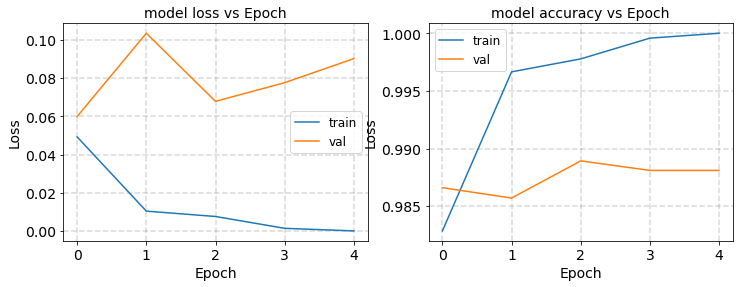

3
Epoch 1/5
1250/1250 - 2s - loss: 0.0748 - accuracy: 0.9847 - val_loss: 0.0798 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 2s - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0980 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 2s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.1343 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 2s - loss: 1.9946e-06 - accuracy: 1.0000 - val_loss: 0.1776 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 2s - loss: 1.4059e-07 - accuracy: 1.0000 - val_loss: 0.1946 - val_accuracy: 0.9858


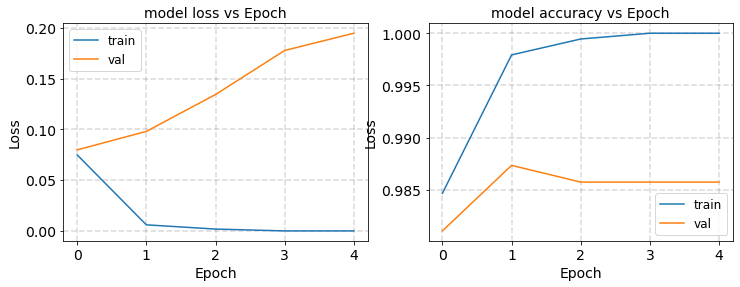

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0692 - accuracy: 0.9865 - val_loss: 0.0541 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.1126 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 2s - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0953 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 2s - loss: 2.2347e-04 - accuracy: 0.9999 - val_loss: 0.1021 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 1.4921e-06 - accuracy: 1.0000 - val_loss: 0.1113 - val_accuracy: 0.9929


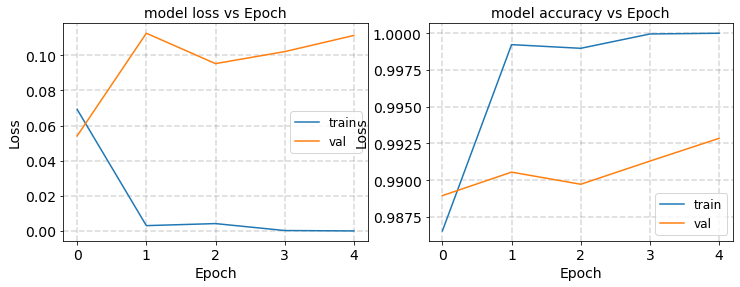

9
Epoch 1/5
1250/1250 - 2s - loss: 0.1040 - accuracy: 0.9893 - val_loss: 0.0866 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 2s - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0752 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 2s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0846 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 2s - loss: 0.0025 - accuracy: 0.9990 - val_loss: 0.1291 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 2s - loss: 1.6867e-05 - accuracy: 1.0000 - val_loss: 0.1960 - val_accuracy: 0.9866


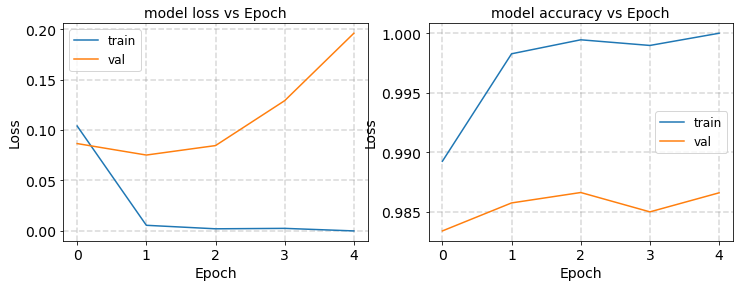

round1 [3 2 8 9]
3
Epoch 1/5
1250/1250 - 2s - loss: 0.1036 - accuracy: 0.9801 - val_loss: 0.0906 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 2s - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.1482 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 2s - loss: 4.2405e-05 - accuracy: 1.0000 - val_loss: 0.1880 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 2s - loss: 6.0345e-06 - accuracy: 1.0000 - val_loss: 0.2070 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 2s - loss: 1.8691e-06 - accuracy: 1.0000 - val_loss: 0.2438 - val_accuracy: 0.9810


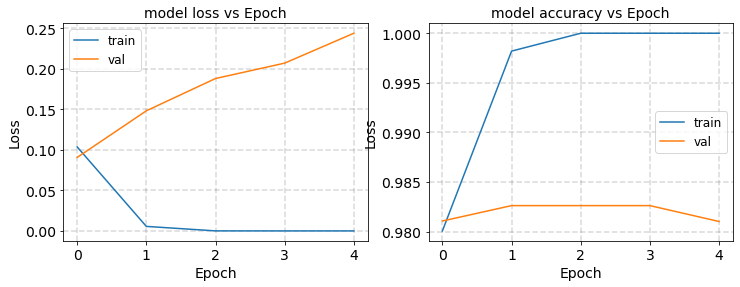

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0693 - accuracy: 0.9890 - val_loss: 0.0984 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 2s - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.1224 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 2s - loss: 5.5994e-06 - accuracy: 1.0000 - val_loss: 0.1590 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 5.3961e-07 - accuracy: 1.0000 - val_loss: 0.1873 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 1.2989e-07 - accuracy: 1.0000 - val_loss: 0.2088 - val_accuracy: 0.9913


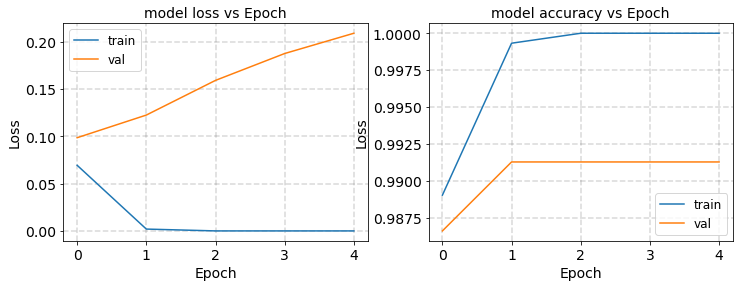

8
Epoch 1/5
1250/1250 - 2s - loss: 0.1220 - accuracy: 0.9784 - val_loss: 0.0703 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 3s - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.0589 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0730 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 3s - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0815 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 2s - loss: 9.0927e-05 - accuracy: 1.0000 - val_loss: 0.0952 - val_accuracy: 0.9841


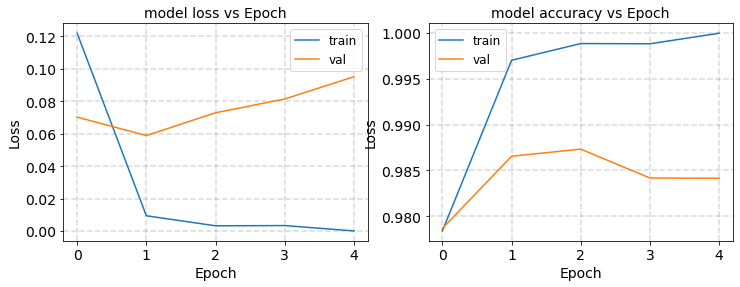

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0804 - accuracy: 0.9877 - val_loss: 0.0966 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 2s - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0906 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 2s - loss: 7.5641e-05 - accuracy: 1.0000 - val_loss: 0.1451 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 2s - loss: 5.1732e-06 - accuracy: 1.0000 - val_loss: 0.1636 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 1.6627e-06 - accuracy: 1.0000 - val_loss: 0.1789 - val_accuracy: 0.9881


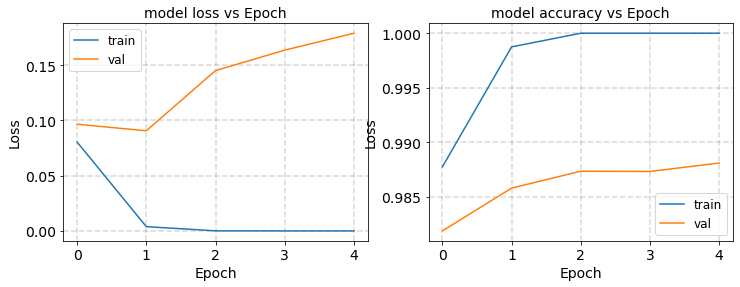

round2 [8 3 2 9]
8
Epoch 1/5
1250/1250 - 2s - loss: 0.0875 - accuracy: 0.9822 - val_loss: 0.0616 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 2s - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.0806 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 2.6849e-04 - accuracy: 0.9999 - val_loss: 0.1229 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 1.3093e-05 - accuracy: 1.0000 - val_loss: 0.1398 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 2s - loss: 4.4411e-06 - accuracy: 1.0000 - val_loss: 0.1538 - val_accuracy: 0.9850


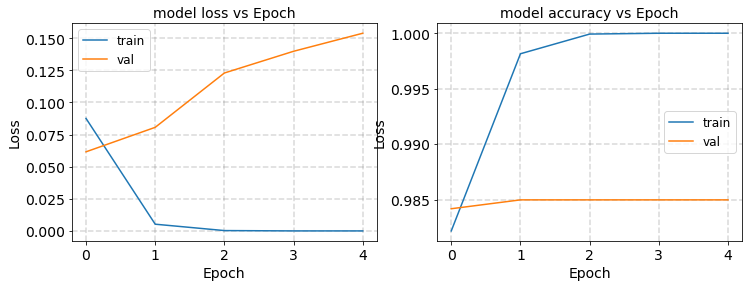

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1385 - accuracy: 0.9773 - val_loss: 0.0637 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 3s - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0837 - val_accuracy: 0.9803
Epoch 3/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.1169 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 2s - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.1406 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 2s - loss: 5.3885e-05 - accuracy: 1.0000 - val_loss: 0.1585 - val_accuracy: 0.9826


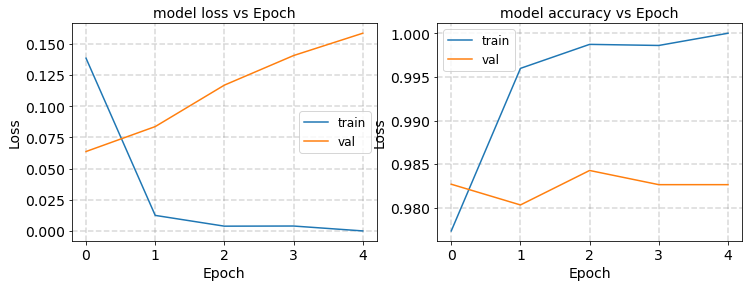

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0801 - accuracy: 0.9846 - val_loss: 0.0664 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 3s - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0964 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 3.8259e-04 - accuracy: 0.9999 - val_loss: 0.1122 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 2.1326e-05 - accuracy: 1.0000 - val_loss: 0.1280 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 6.7467e-06 - accuracy: 1.0000 - val_loss: 0.1447 - val_accuracy: 0.9913


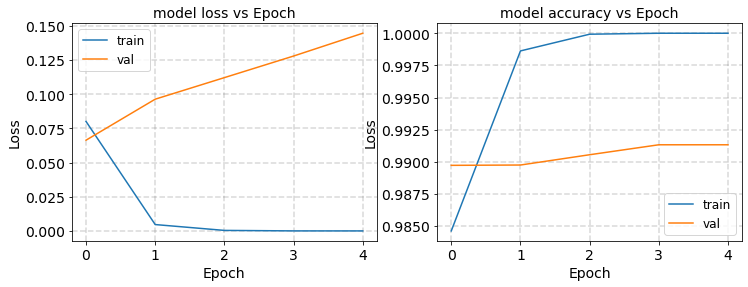

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0855 - accuracy: 0.9868 - val_loss: 0.0523 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0705 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.0473 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 4s - loss: 1.1227e-04 - accuracy: 1.0000 - val_loss: 0.0595 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 3s - loss: 1.2425e-05 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9897


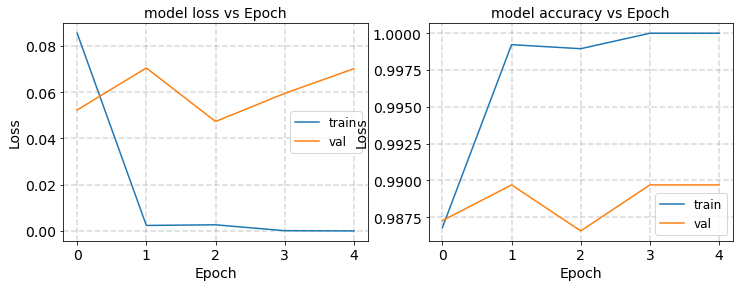

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
________________________________________________

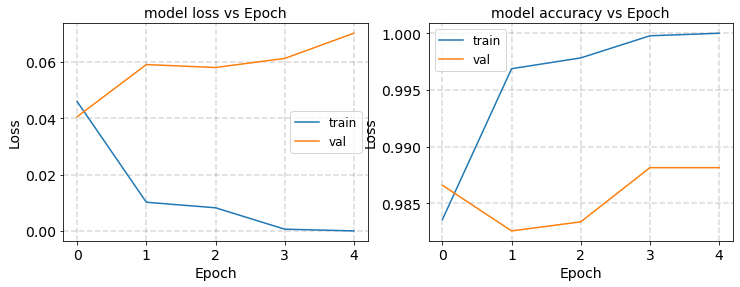

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0468 - accuracy: 0.9901 - val_loss: 0.0297 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 5s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0437 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 5s - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0552 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 5s - loss: 2.0334e-06 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 5s - loss: 5.0325e-07 - accuracy: 1.0000 - val_loss: 0.0751 - val_accuracy: 0.9921


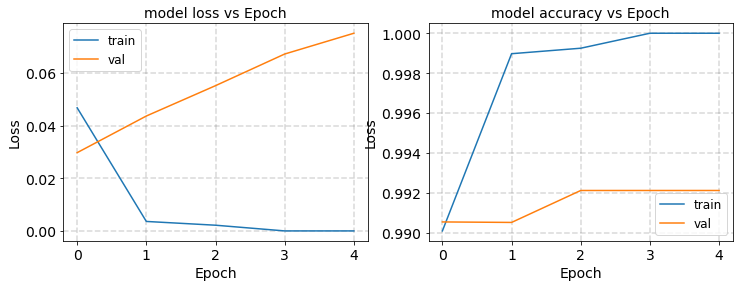

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0848 - accuracy: 0.9852 - val_loss: 0.0284 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 5s - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0414 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 5s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0643 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 5s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0642 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 5s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0621 - val_accuracy: 0.9929


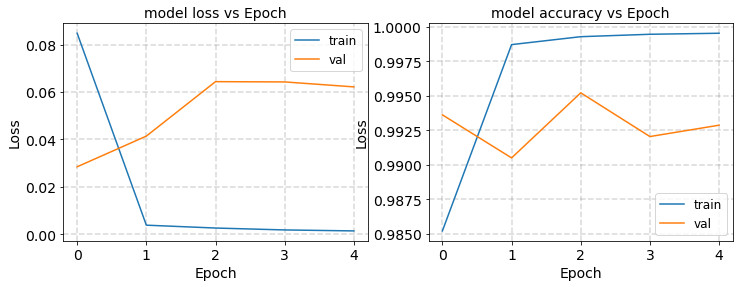

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0967 - accuracy: 0.9800 - val_loss: 0.1390 - val_accuracy: 0.9731
Epoch 2/5
1250/1250 - 5s - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.0858 - val_accuracy: 0.9833
Epoch 3/5
1250/1250 - 5s - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.1216 - val_accuracy: 0.9849
Epoch 4/5
1250/1250 - 5s - loss: 8.0744e-06 - accuracy: 1.0000 - val_loss: 0.1817 - val_accuracy: 0.9857
Epoch 5/5
1250/1250 - 5s - loss: 2.4748e-07 - accuracy: 1.0000 - val_loss: 0.2100 - val_accuracy: 0.9857


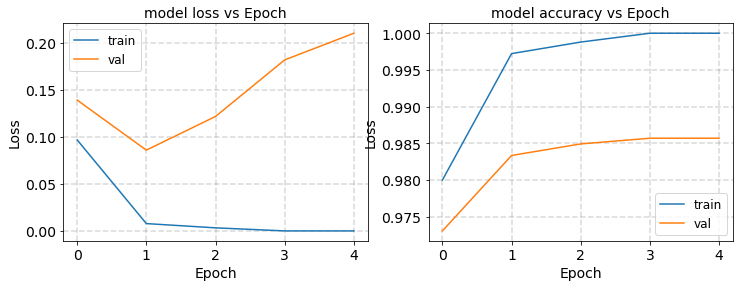

round1 [8 2 3 9]
8
Epoch 1/5
1250/1250 - 5s - loss: 0.0852 - accuracy: 0.9849 - val_loss: 0.0503 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 5s - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.0517 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 5s - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.1084 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 5s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0754 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 5s - loss: 1.3835e-05 - accuracy: 1.0000 - val_loss: 0.0874 - val_accuracy: 0.9873


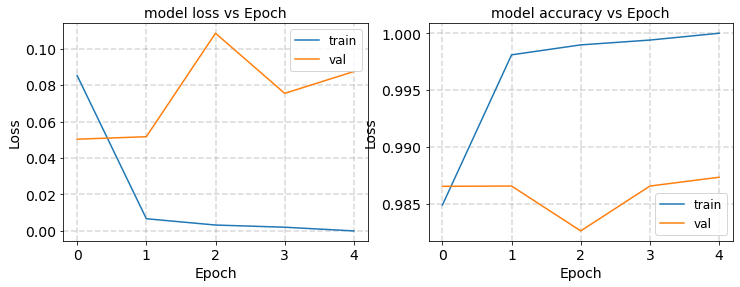

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0785 - accuracy: 0.9862 - val_loss: 0.0302 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 5s - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0506 - val_accuracy: 0.9928
Epoch 3/5
1250/1250 - 5s - loss: 7.6758e-04 - accuracy: 0.9997 - val_loss: 0.0543 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 5s - loss: 4.9534e-06 - accuracy: 1.0000 - val_loss: 0.0873 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 5s - loss: 7.0875e-07 - accuracy: 1.0000 - val_loss: 0.0990 - val_accuracy: 0.9944


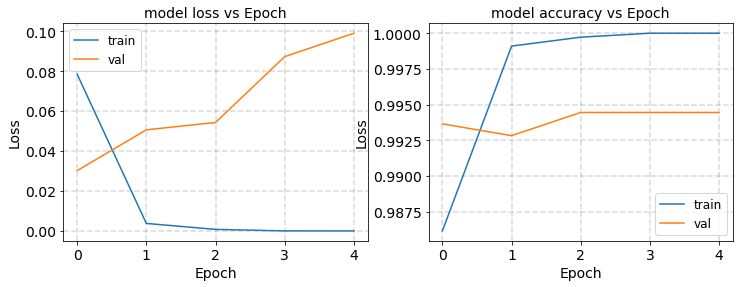

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1137 - accuracy: 0.9807 - val_loss: 0.0701 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 5s - loss: 0.0056 - accuracy: 0.9980 - val_loss: 0.0745 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 5s - loss: 1.5044e-04 - accuracy: 1.0000 - val_loss: 0.1284 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 5s - loss: 1.1425e-05 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 5s - loss: 3.0316e-06 - accuracy: 1.0000 - val_loss: 0.1607 - val_accuracy: 0.9889


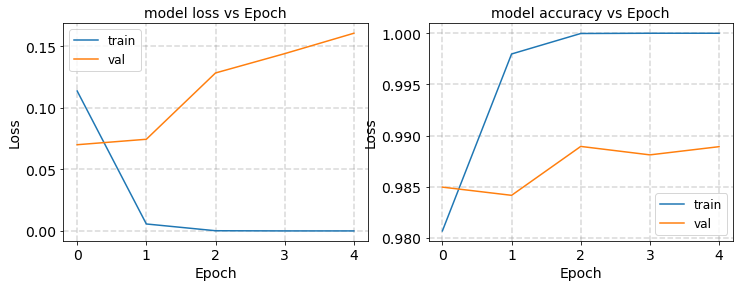

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0764 - accuracy: 0.9884 - val_loss: 0.0426 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 5s - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.1592 - val_accuracy: 0.9786
Epoch 3/5
1250/1250 - 5s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0809 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 5s - loss: 5.7965e-06 - accuracy: 1.0000 - val_loss: 0.1060 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 5s - loss: 1.6567e-06 - accuracy: 1.0000 - val_loss: 0.1229 - val_accuracy: 0.9913


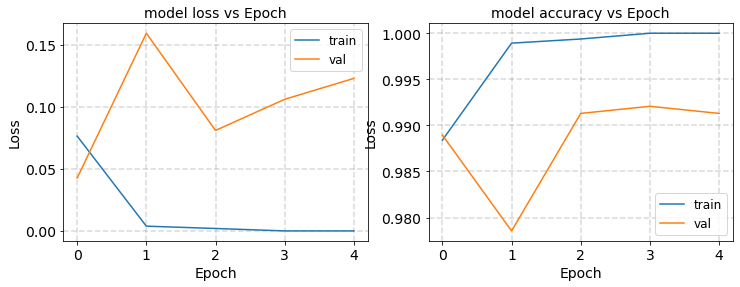

round2 [9 8 3 2]
9
Epoch 1/5
1250/1250 - 5s - loss: 7.2222e-07 - accuracy: 1.0000 - val_loss: 0.1345 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 5s - loss: 3.3703e-07 - accuracy: 1.0000 - val_loss: 0.1443 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 5s - loss: 1.6251e-07 - accuracy: 1.0000 - val_loss: 0.1562 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 5s - loss: 7.9107e-08 - accuracy: 1.0000 - val_loss: 0.1648 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 5s - loss: 3.9998e-08 - accuracy: 1.0000 - val_loss: 0.1728 - val_accuracy: 0.9913


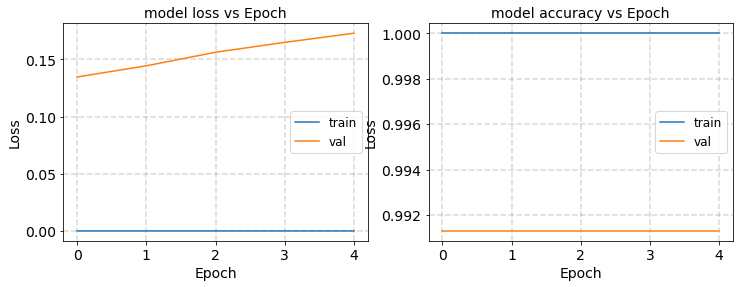

8
Epoch 1/5
1250/1250 - 6s - loss: 0.1210 - accuracy: 0.9820 - val_loss: 0.0545 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 5s - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0685 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 5s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.1412 - val_accuracy: 0.9770
Epoch 4/5
1250/1250 - 5s - loss: 2.3808e-04 - accuracy: 0.9999 - val_loss: 0.1126 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 5s - loss: 5.3340e-06 - accuracy: 1.0000 - val_loss: 0.1219 - val_accuracy: 0.9889


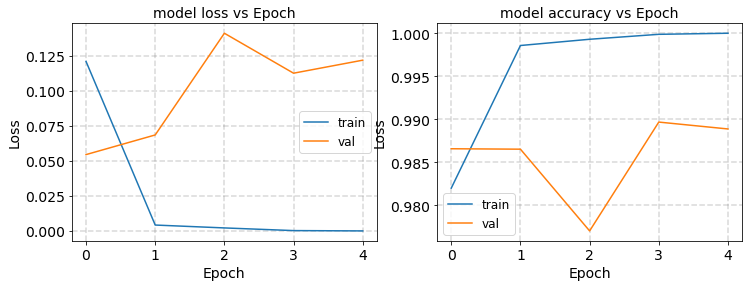

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0971 - accuracy: 0.9769 - val_loss: 0.0607 - val_accuracy: 0.9833
Epoch 2/5
1250/1250 - 5s - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0815 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 5s - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.1100 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 5s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0837 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 5s - loss: 1.4580e-05 - accuracy: 1.0000 - val_loss: 0.1033 - val_accuracy: 0.9865


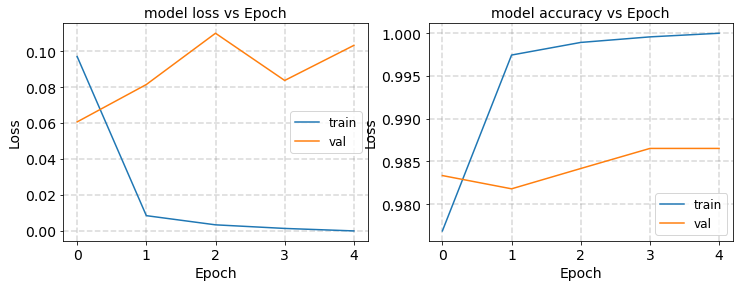

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0875 - accuracy: 0.9865 - val_loss: 0.0577 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 5s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.1003 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 5s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0938 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 5s - loss: 9.4901e-05 - accuracy: 1.0000 - val_loss: 0.1115 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 5s - loss: 6.8058e-06 - accuracy: 1.0000 - val_loss: 0.1206 - val_accuracy: 0.9929


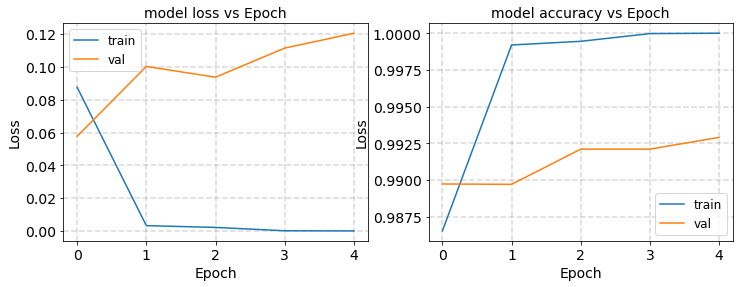

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
________________________________________________

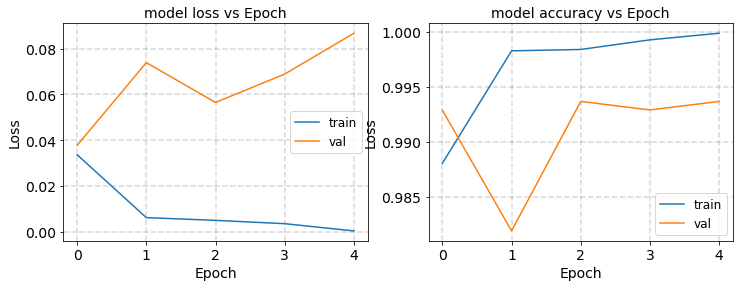

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0893 - accuracy: 0.9821 - val_loss: 0.0571 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.0653 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 4s - loss: 1.4544e-04 - accuracy: 1.0000 - val_loss: 0.1169 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 3.6886e-06 - accuracy: 1.0000 - val_loss: 0.1321 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 1.1669e-06 - accuracy: 1.0000 - val_loss: 0.1474 - val_accuracy: 0.9858


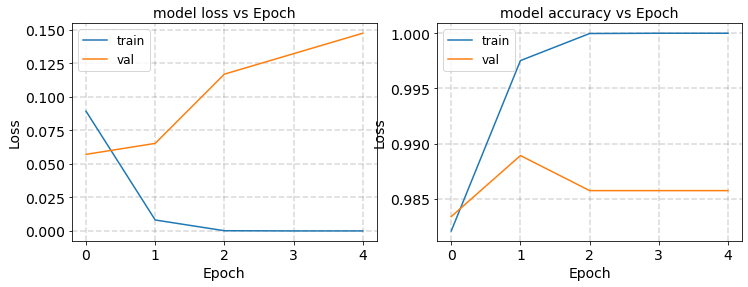

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0823 - accuracy: 0.9823 - val_loss: 0.0537 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 4s - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.0406 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 4s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0306 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0431 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 4s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0610 - val_accuracy: 0.9898


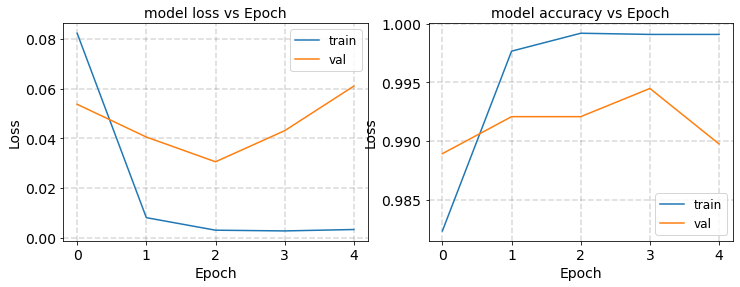

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0639 - accuracy: 0.9872 - val_loss: 0.0839 - val_accuracy: 0.9684
Epoch 2/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0614 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 1.3767e-05 - accuracy: 1.0000 - val_loss: 0.0766 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 2.0974e-06 - accuracy: 1.0000 - val_loss: 0.0926 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 5s - loss: 6.3675e-07 - accuracy: 1.0000 - val_loss: 0.1058 - val_accuracy: 0.9898


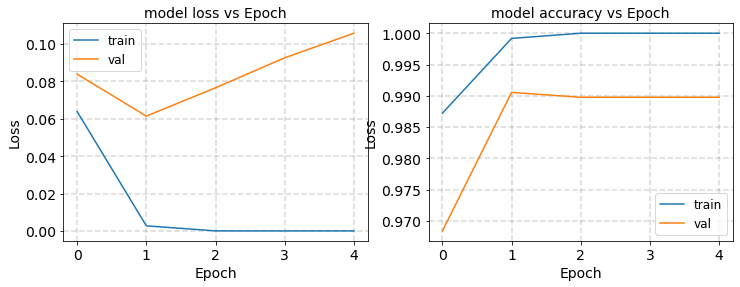

round1 [8 3 9 2]
8
Epoch 1/5
1250/1250 - 5s - loss: 0.0698 - accuracy: 0.9850 - val_loss: 0.0349 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0540 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 5s - loss: 5.9728e-06 - accuracy: 1.0000 - val_loss: 0.0742 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 5s - loss: 8.8295e-07 - accuracy: 1.0000 - val_loss: 0.0814 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 5s - loss: 3.8785e-07 - accuracy: 1.0000 - val_loss: 0.0889 - val_accuracy: 0.9897


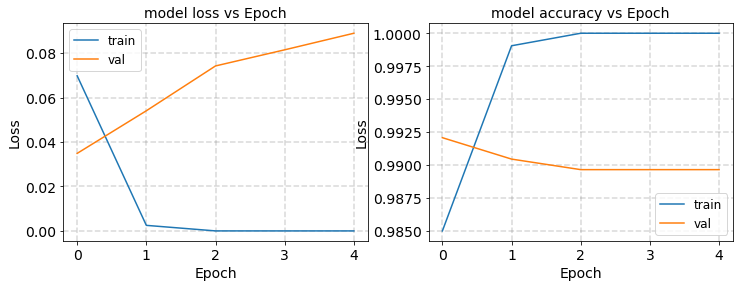

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1137 - accuracy: 0.9790 - val_loss: 0.0883 - val_accuracy: 0.9715
Epoch 2/5
1250/1250 - 5s - loss: 0.0059 - accuracy: 0.9978 - val_loss: 0.0964 - val_accuracy: 0.9833
Epoch 3/5
1250/1250 - 5s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.1125 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.1150 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 9.8493e-06 - accuracy: 1.0000 - val_loss: 0.1347 - val_accuracy: 0.9850


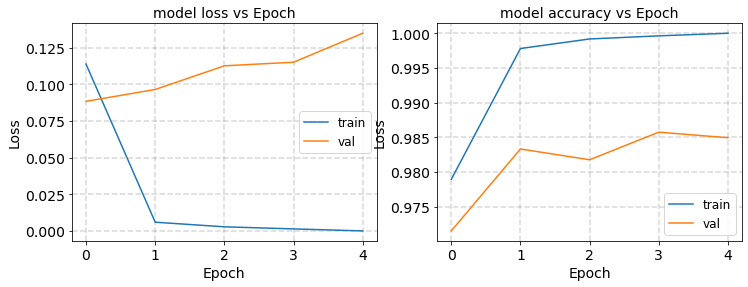

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0566 - accuracy: 0.9909 - val_loss: 0.0690 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 5s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0657 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0756 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 1.0097e-05 - accuracy: 1.0000 - val_loss: 0.0872 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 5s - loss: 2.5655e-06 - accuracy: 1.0000 - val_loss: 0.0973 - val_accuracy: 0.9913


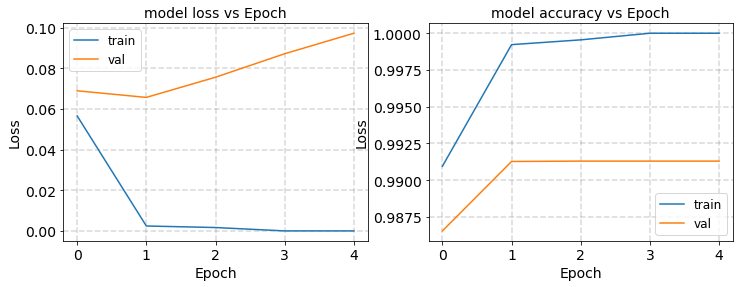

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1205 - accuracy: 0.9781 - val_loss: 0.0694 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 5s - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0741 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 4s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0709 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0682 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 4s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0651 - val_accuracy: 0.9913


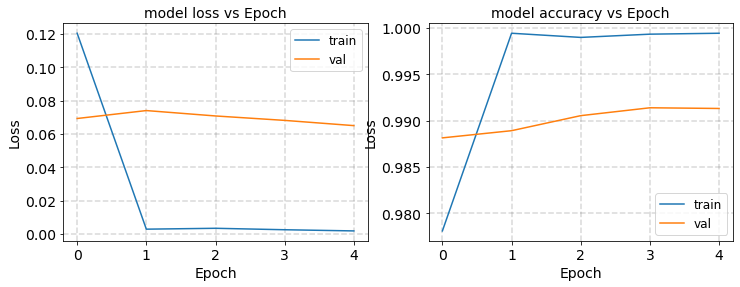

round2 [8 3 9 2]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.0695 - accuracy: 0.9854 - val_loss: 0.0861 - val_accuracy: 0.9833
Epoch 2/5
1250/1250 - 4s - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0843 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 1.0034e-05 - accuracy: 1.0000 - val_loss: 0.1010 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 1.9786e-06 - accuracy: 1.0000 - val_loss: 0.1128 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 5s - loss: 6.9372e-07 - accuracy: 1.0000 - val_loss: 0.1213 - val_accuracy: 0.9913


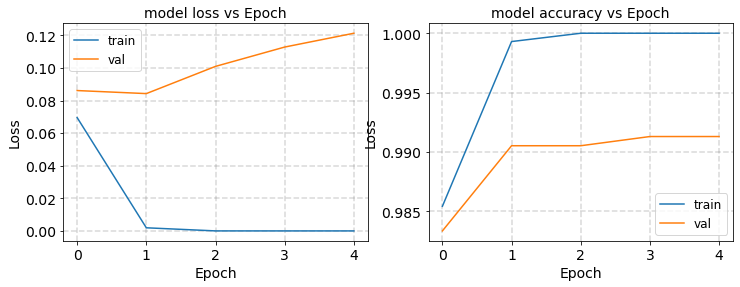

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0959 - accuracy: 0.9850 - val_loss: 0.0809 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 5s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0856 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 5s - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.1200 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 5s - loss: 1.1687e-04 - accuracy: 1.0000 - val_loss: 0.1643 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 5s - loss: 2.2908e-05 - accuracy: 1.0000 - val_loss: 0.1851 - val_accuracy: 0.9897


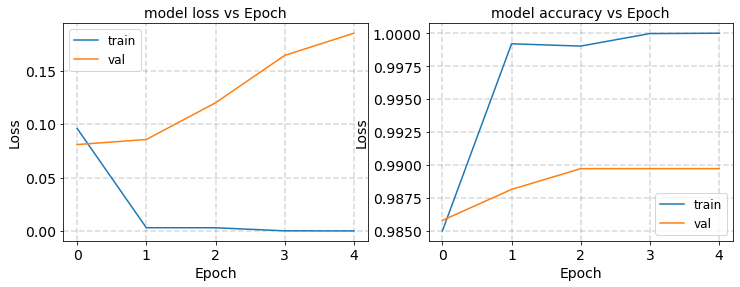

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0899 - accuracy: 0.9863 - val_loss: 0.0709 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 5s - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.0627 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 5s - loss: 1.8939e-04 - accuracy: 1.0000 - val_loss: 0.0964 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 5s - loss: 7.7217e-06 - accuracy: 1.0000 - val_loss: 0.1111 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 5s - loss: 1.4940e-06 - accuracy: 1.0000 - val_loss: 0.1288 - val_accuracy: 0.9937


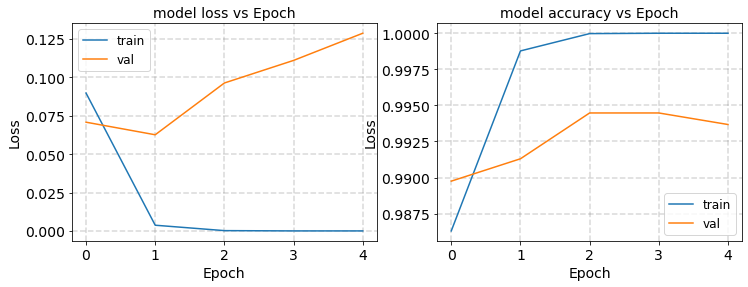

2
Epoch 1/5
1250/1250 - 5s - loss: 0.1563 - accuracy: 0.9883 - val_loss: 0.0506 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 5s - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0603 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 4s - loss: 6.6241e-04 - accuracy: 0.9998 - val_loss: 0.0809 - val_accuracy: 0.9953
Epoch 4/5
1250/1250 - 5s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0798 - val_accuracy: 0.9953
Epoch 5/5
1250/1250 - 5s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0669 - val_accuracy: 0.9937


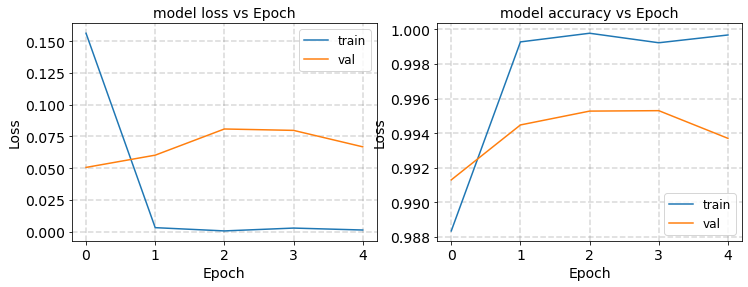

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
________________________________________________

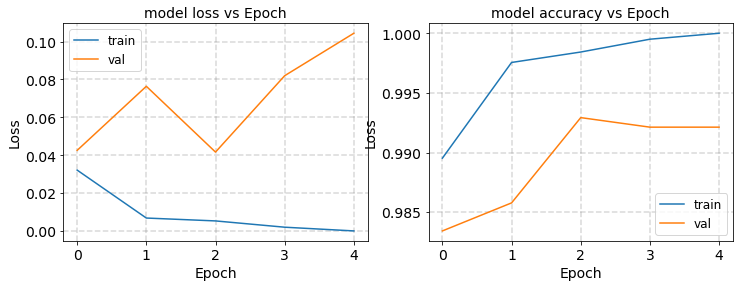

3
Epoch 1/5
1250/1250 - 6s - loss: 0.0851 - accuracy: 0.9821 - val_loss: 0.0503 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 5s - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.0717 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 5s - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.1015 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 5s - loss: 1.4712e-06 - accuracy: 1.0000 - val_loss: 0.1266 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 2.3215e-07 - accuracy: 1.0000 - val_loss: 0.1425 - val_accuracy: 0.9866


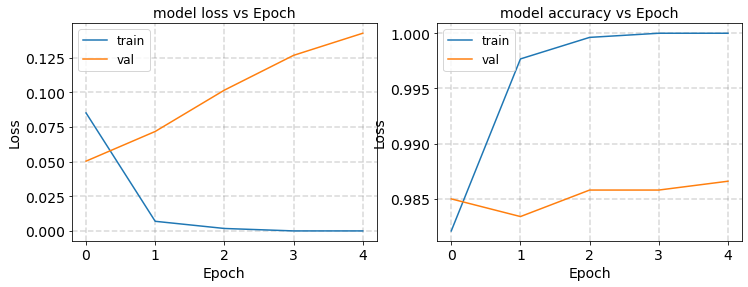

8
Epoch 1/5
1250/1250 - 6s - loss: 0.0813 - accuracy: 0.9836 - val_loss: 0.0772 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 5s - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0824 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 5s - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0610 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 5s - loss: 4.1358e-04 - accuracy: 0.9999 - val_loss: 0.1527 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 5s - loss: 3.1275e-06 - accuracy: 1.0000 - val_loss: 0.1695 - val_accuracy: 0.9850


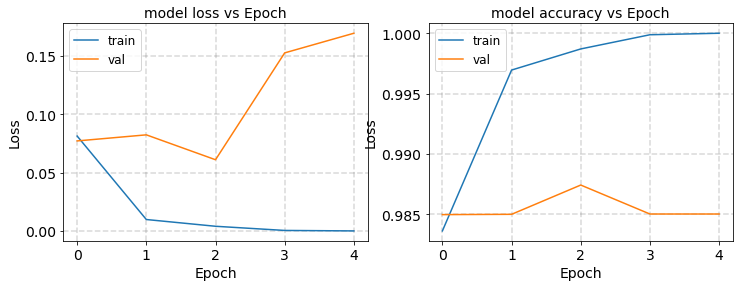

2
Epoch 1/5
1250/1250 - 5s - loss: 0.1375 - accuracy: 0.9855 - val_loss: 0.0534 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 5s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0508 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 5s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0608 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 5s - loss: 1.0027e-05 - accuracy: 1.0000 - val_loss: 0.0789 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 4.3348e-07 - accuracy: 1.0000 - val_loss: 0.1158 - val_accuracy: 0.9929


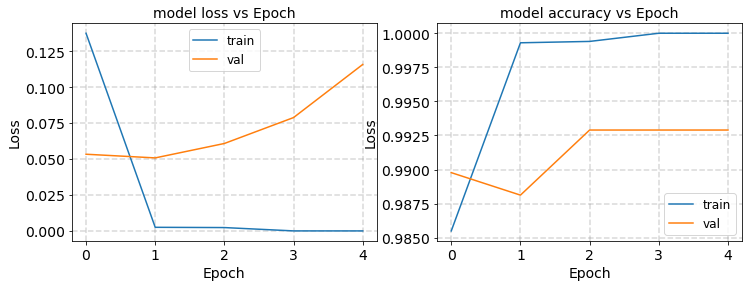

round1 [3 9 2 8]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.1061 - accuracy: 0.9837 - val_loss: 0.0652 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 5s - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.0873 - val_accuracy: 0.9817
Epoch 3/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.1137 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 4s - loss: 2.6938e-05 - accuracy: 1.0000 - val_loss: 0.1500 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 1.4279e-06 - accuracy: 1.0000 - val_loss: 0.1738 - val_accuracy: 0.9890


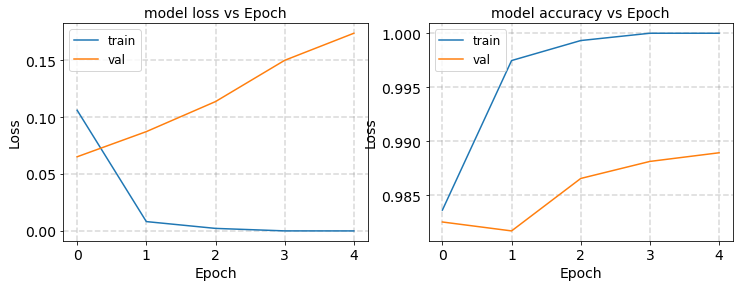

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0729 - accuracy: 0.9899 - val_loss: 0.1065 - val_accuracy: 0.9738
Epoch 2/5
1250/1250 - 4s - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0608 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0671 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 1.6396e-05 - accuracy: 1.0000 - val_loss: 0.0982 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 1.9771e-06 - accuracy: 1.0000 - val_loss: 0.1276 - val_accuracy: 0.9929


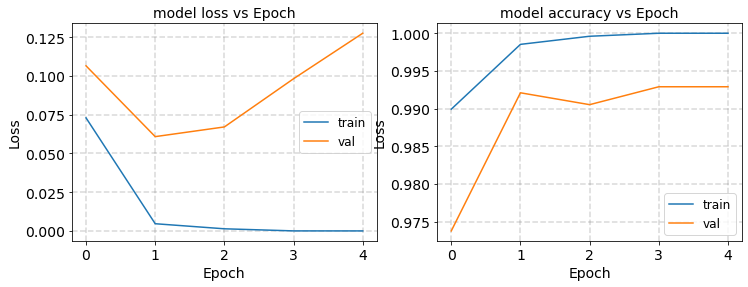

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1403 - accuracy: 0.9788 - val_loss: 0.0456 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 4s - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0615 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0873 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 4s - loss: 1.1908e-04 - accuracy: 1.0000 - val_loss: 0.1254 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 1.1481e-05 - accuracy: 1.0000 - val_loss: 0.1631 - val_accuracy: 0.9897


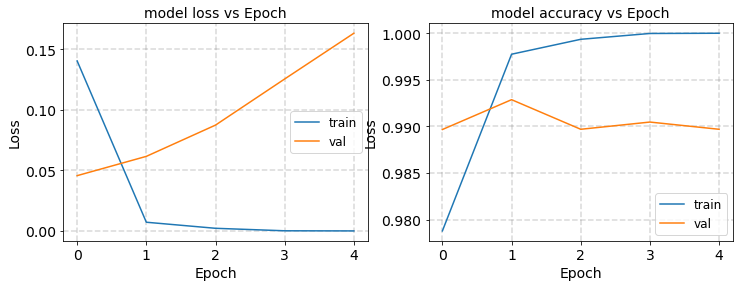

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1089 - accuracy: 0.9729 - val_loss: 0.0403 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.0526 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 4s - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0613 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 4.3002e-04 - accuracy: 0.9999 - val_loss: 0.0593 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 4s - loss: 9.6466e-06 - accuracy: 1.0000 - val_loss: 0.0780 - val_accuracy: 0.9897


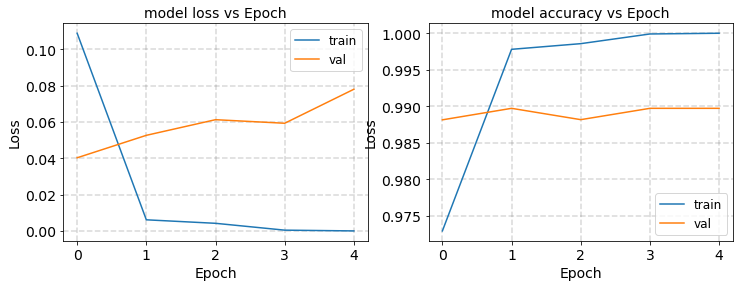

round2 [2 8 3 9]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.1248 - accuracy: 0.9854 - val_loss: 0.0428 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0645 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 4.0480e-04 - accuracy: 0.9999 - val_loss: 0.0876 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 1.0845e-05 - accuracy: 1.0000 - val_loss: 0.1007 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 3.0954e-06 - accuracy: 1.0000 - val_loss: 0.1097 - val_accuracy: 0.9897


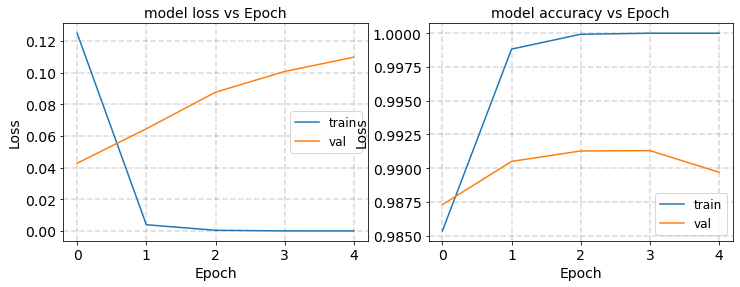

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0943 - accuracy: 0.9852 - val_loss: 0.0729 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0929 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.1010 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 7.8746e-05 - accuracy: 1.0000 - val_loss: 0.1512 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 3s - loss: 5.2362e-06 - accuracy: 1.0000 - val_loss: 0.1770 - val_accuracy: 0.9851


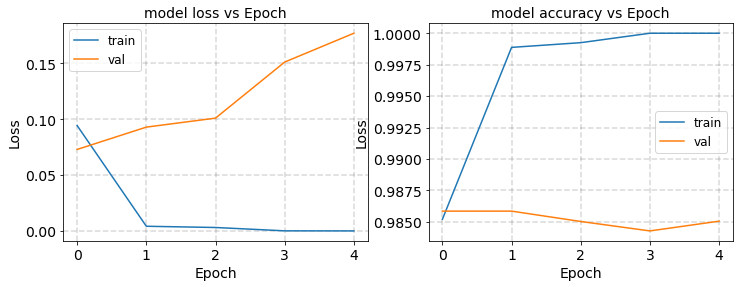

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1286 - accuracy: 0.9764 - val_loss: 0.0695 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 3s - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.1114 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 4s - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.1041 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 4.2597e-04 - accuracy: 0.9999 - val_loss: 0.1302 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 2.8451e-05 - accuracy: 1.0000 - val_loss: 0.1728 - val_accuracy: 0.9850


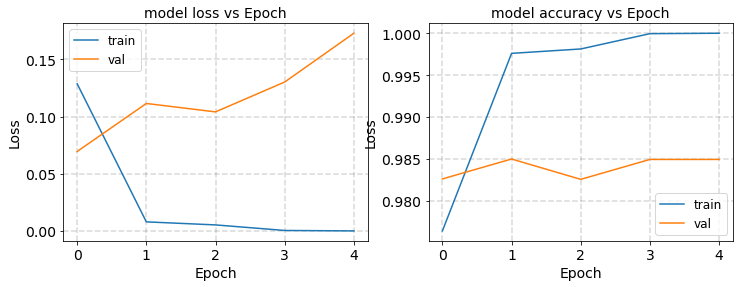

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0826 - accuracy: 0.9848 - val_loss: 0.0427 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.0519 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0533 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 4.1066e-04 - accuracy: 0.9999 - val_loss: 0.0924 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 1.1637e-05 - accuracy: 1.0000 - val_loss: 0.1043 - val_accuracy: 0.9929


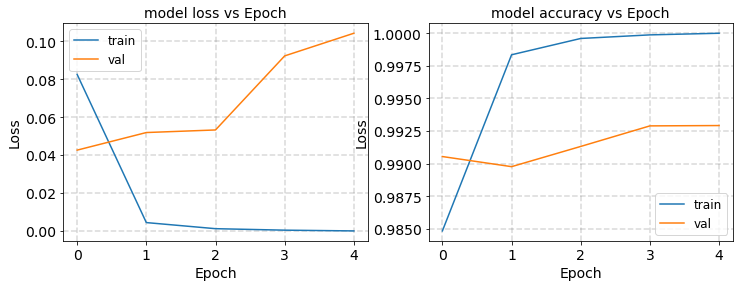

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
________________________________________________

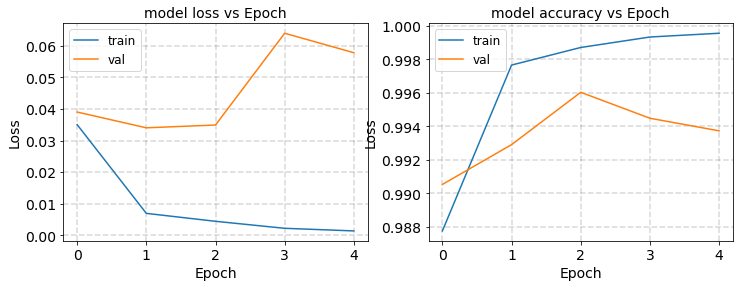

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0803 - accuracy: 0.9814 - val_loss: 0.0587 - val_accuracy: 0.9810
Epoch 2/5
1250/1250 - 4s - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0701 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 4s - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.1024 - val_accuracy: 0.9841
Epoch 4/5
1250/1250 - 4s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.1217 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0865 - val_accuracy: 0.9881


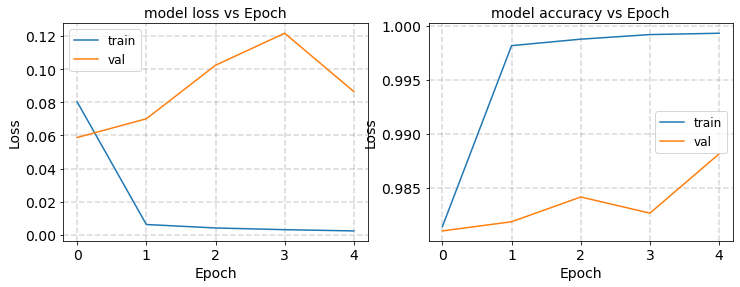

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0548 - accuracy: 0.9894 - val_loss: 0.0359 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0293 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 4s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0248 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0339 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 4s - loss: 1.0906e-06 - accuracy: 1.0000 - val_loss: 0.0587 - val_accuracy: 0.9921


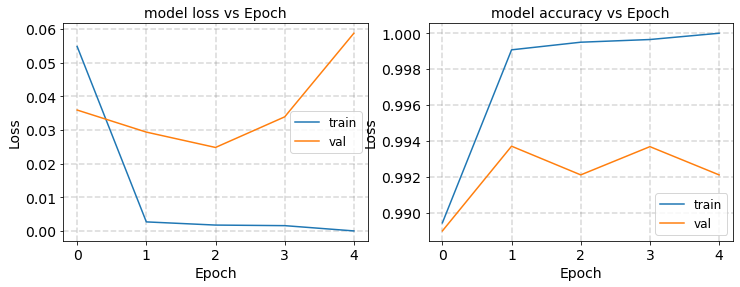

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0810 - accuracy: 0.9830 - val_loss: 0.0912 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 5s - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.0931 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.1079 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.1455 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 4s - loss: 5.4785e-06 - accuracy: 1.0000 - val_loss: 0.1806 - val_accuracy: 0.9874


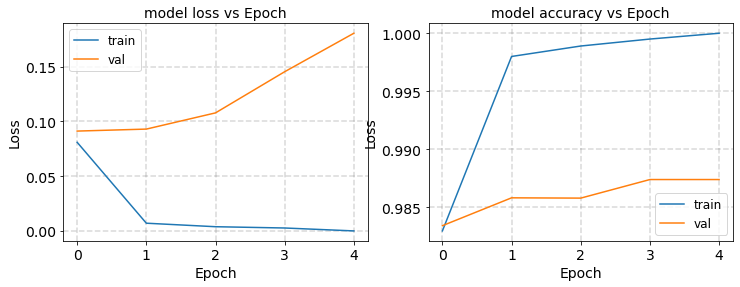

round1 [3 9 2 8]
3
Epoch 1/5
1250/1250 - 4s - loss: 9.4439e-07 - accuracy: 1.0000 - val_loss: 0.2070 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 4s - loss: 9.5361e-08 - accuracy: 1.0000 - val_loss: 0.2404 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 5s - loss: 1.7416e-08 - accuracy: 1.0000 - val_loss: 0.2537 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 5s - loss: 7.0299e-09 - accuracy: 1.0000 - val_loss: 0.2646 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 5s - loss: 3.5045e-09 - accuracy: 1.0000 - val_loss: 0.2726 - val_accuracy: 0.9874


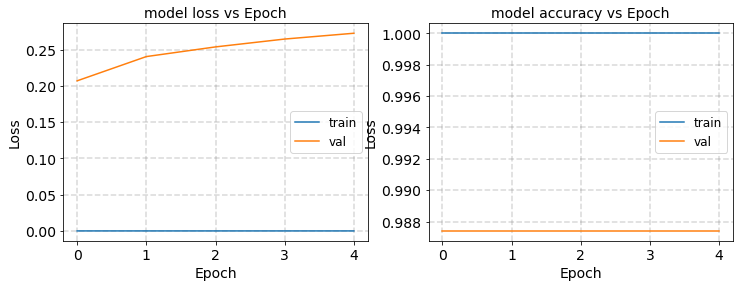

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0935 - accuracy: 0.9919 - val_loss: 0.0412 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 5s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0253 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 5s - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.0627 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 5s - loss: 5.0005e-06 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 5s - loss: 1.0353e-06 - accuracy: 1.0000 - val_loss: 0.0818 - val_accuracy: 0.9944


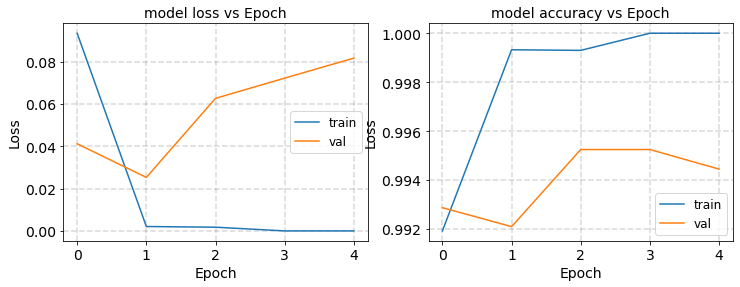

2
Epoch 1/5
1250/1250 - 5s - loss: 0.1596 - accuracy: 0.9852 - val_loss: 0.0239 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 5s - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0436 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 5s - loss: 2.0782e-05 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 4s - loss: 5.5398e-06 - accuracy: 1.0000 - val_loss: 0.0624 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 5s - loss: 2.0049e-06 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 0.9937


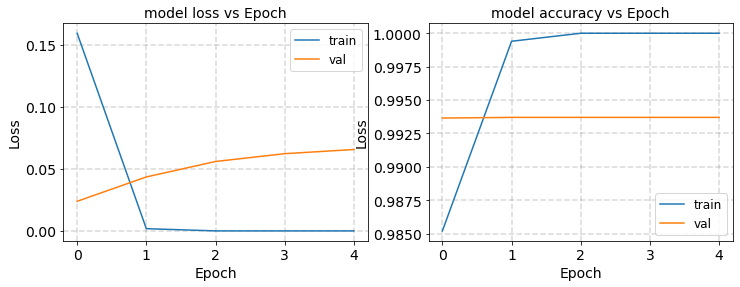

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0750 - accuracy: 0.9843 - val_loss: 0.0667 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 5s - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.0603 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 5s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.1057 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 1.2225e-05 - accuracy: 1.0000 - val_loss: 0.1734 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 5s - loss: 5.9414e-07 - accuracy: 1.0000 - val_loss: 0.2089 - val_accuracy: 0.9858


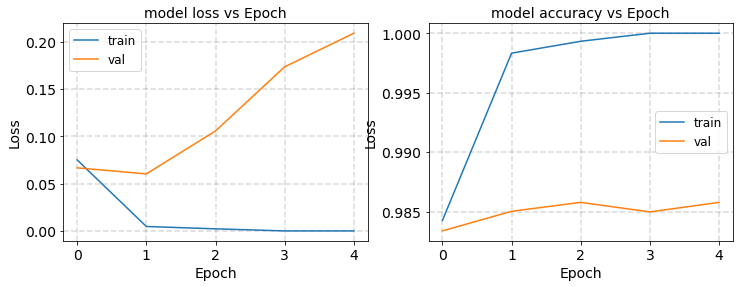

round2 [2 9 3 8]
2
Epoch 1/5
1250/1250 - 5s - loss: 0.0884 - accuracy: 0.9849 - val_loss: 0.0417 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 4s - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0710 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 5.5486e-04 - accuracy: 0.9998 - val_loss: 0.0873 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 4s - loss: 9.0616e-07 - accuracy: 1.0000 - val_loss: 0.0953 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 4s - loss: 3.6379e-07 - accuracy: 1.0000 - val_loss: 0.1013 - val_accuracy: 0.9944


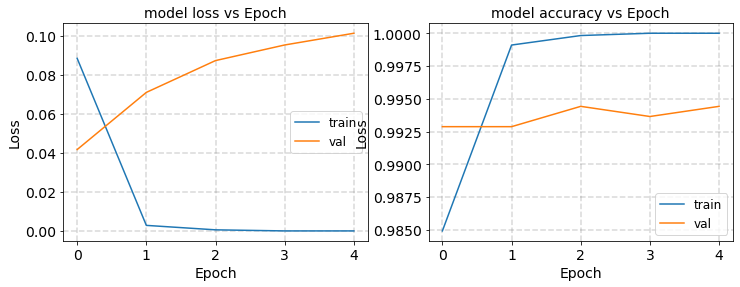

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0779 - accuracy: 0.9881 - val_loss: 0.0402 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0504 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 2.7802e-05 - accuracy: 1.0000 - val_loss: 0.0563 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 2.5414e-06 - accuracy: 1.0000 - val_loss: 0.0666 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 8.9594e-07 - accuracy: 1.0000 - val_loss: 0.0717 - val_accuracy: 0.9922


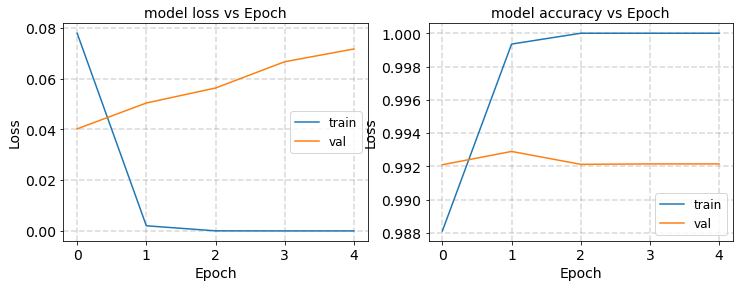

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0890 - accuracy: 0.9872 - val_loss: 0.0964 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0767 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.0795 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 3.1572e-04 - accuracy: 0.9999 - val_loss: 0.1185 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 4s - loss: 1.0932e-05 - accuracy: 1.0000 - val_loss: 0.1358 - val_accuracy: 0.9874


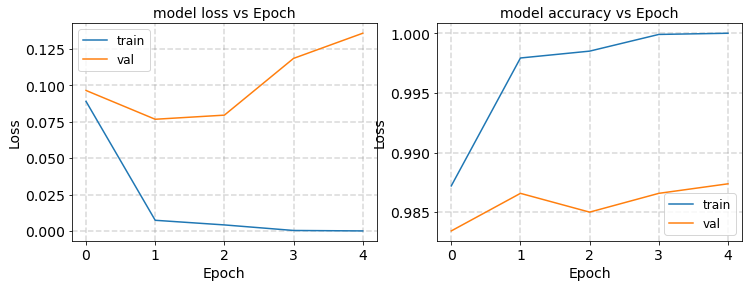

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0715 - accuracy: 0.9858 - val_loss: 0.1009 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1749 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 2.3776e-06 - accuracy: 1.0000 - val_loss: 0.2205 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 3.2592e-07 - accuracy: 1.0000 - val_loss: 0.2395 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 1.4563e-07 - accuracy: 1.0000 - val_loss: 0.2521 - val_accuracy: 0.9858


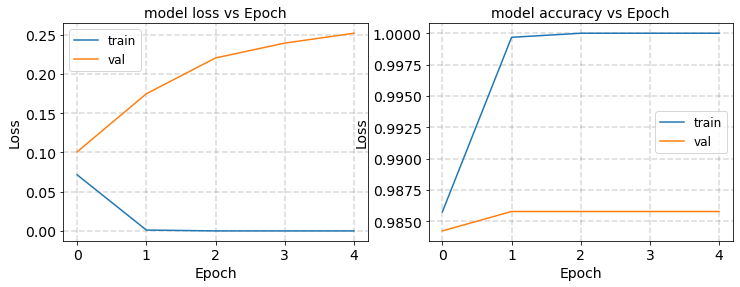

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
________________________________________________

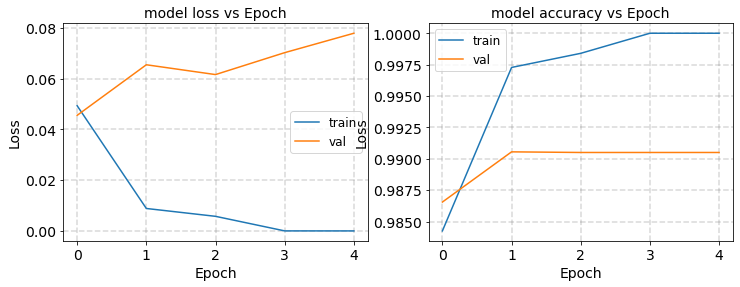

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0642 - accuracy: 0.9878 - val_loss: 0.0476 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 4s - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.0309 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 4s - loss: 1.9977e-04 - accuracy: 0.9999 - val_loss: 0.0615 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 5s - loss: 5.0302e-07 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 4s - loss: 1.3209e-07 - accuracy: 1.0000 - val_loss: 0.0767 - val_accuracy: 0.9944


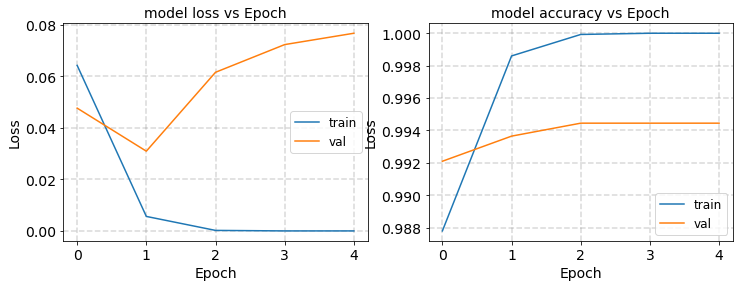

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0787 - accuracy: 0.9865 - val_loss: 0.0888 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 5s - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.1099 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 5s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.1371 - val_accuracy: 0.9865
Epoch 4/5
1250/1250 - 4s - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.1005 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 5s - loss: 8.2459e-06 - accuracy: 1.0000 - val_loss: 0.1444 - val_accuracy: 0.9866


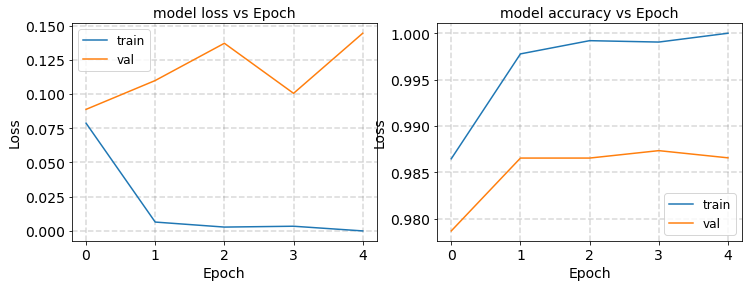

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1318 - accuracy: 0.9689 - val_loss: 0.0692 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 5s - loss: 0.0117 - accuracy: 0.9965 - val_loss: 0.0661 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 5s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0818 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 5s - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0805 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 5s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.1021 - val_accuracy: 0.9882


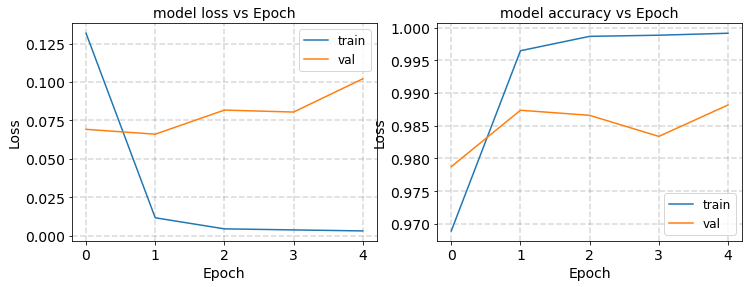

round1 [3 8 9 2]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.0788 - accuracy: 0.9801 - val_loss: 0.0618 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 5s - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0734 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 5s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0756 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 5s - loss: 2.2103e-05 - accuracy: 1.0000 - val_loss: 0.0941 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 5s - loss: 3.8582e-06 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 0.9866


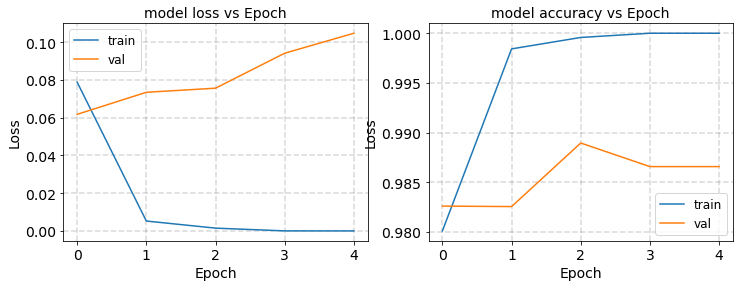

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0596 - accuracy: 0.9876 - val_loss: 0.0733 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 5s - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0946 - val_accuracy: 0.9857
Epoch 3/5
1250/1250 - 5s - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.1043 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 5s - loss: 2.0068e-05 - accuracy: 1.0000 - val_loss: 0.1304 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 2.7555e-06 - accuracy: 1.0000 - val_loss: 0.1457 - val_accuracy: 0.9866


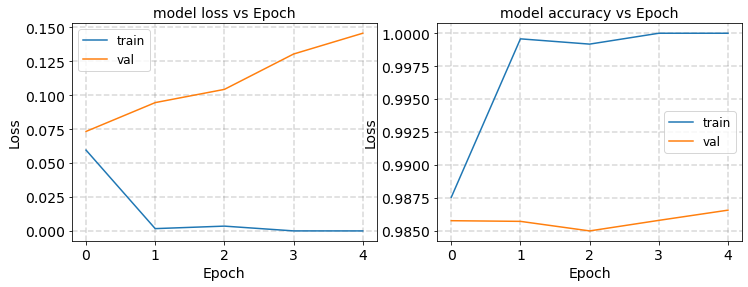

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0857 - accuracy: 0.9868 - val_loss: 0.0432 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 5s - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.0824 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 5s - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0640 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 5s - loss: 1.8760e-05 - accuracy: 1.0000 - val_loss: 0.1014 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 5s - loss: 4.7731e-06 - accuracy: 1.0000 - val_loss: 0.1161 - val_accuracy: 0.9929


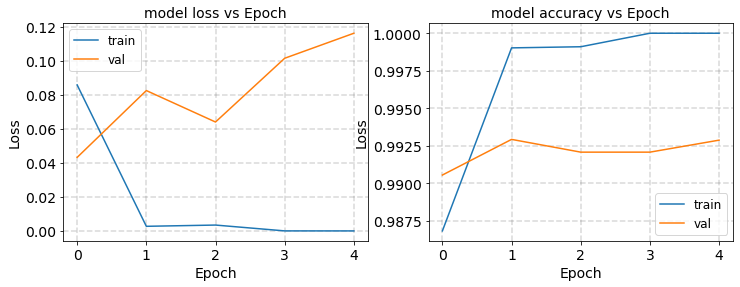

2
Epoch 1/5
1250/1250 - 5s - loss: 0.2565 - accuracy: 0.9778 - val_loss: 0.0697 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 5s - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0859 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 5s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0995 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 5s - loss: 7.3275e-05 - accuracy: 1.0000 - val_loss: 0.1074 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 5s - loss: 1.0361e-05 - accuracy: 1.0000 - val_loss: 0.1337 - val_accuracy: 0.9952


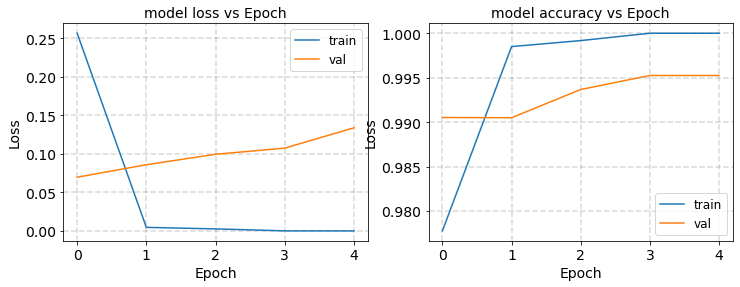

round2 [2 3 9 8]
2
Epoch 1/5
1250/1250 - 5s - loss: 2.5693e-06 - accuracy: 1.0000 - val_loss: 0.1479 - val_accuracy: 0.9952
Epoch 2/5
1250/1250 - 4s - loss: 8.4368e-07 - accuracy: 1.0000 - val_loss: 0.1604 - val_accuracy: 0.9952
Epoch 3/5
1250/1250 - 4s - loss: 3.3787e-07 - accuracy: 1.0000 - val_loss: 0.1709 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 4s - loss: 1.3962e-07 - accuracy: 1.0000 - val_loss: 0.1807 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 4s - loss: 5.7297e-08 - accuracy: 1.0000 - val_loss: 0.1913 - val_accuracy: 0.9952


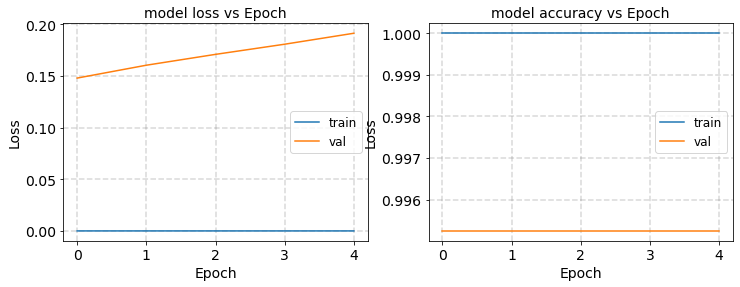

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1673 - accuracy: 0.9707 - val_loss: 0.0536 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 4s - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0661 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 4s - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0594 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 4s - loss: 2.9584e-04 - accuracy: 0.9999 - val_loss: 0.0725 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 4.8473e-06 - accuracy: 1.0000 - val_loss: 0.0854 - val_accuracy: 0.9897


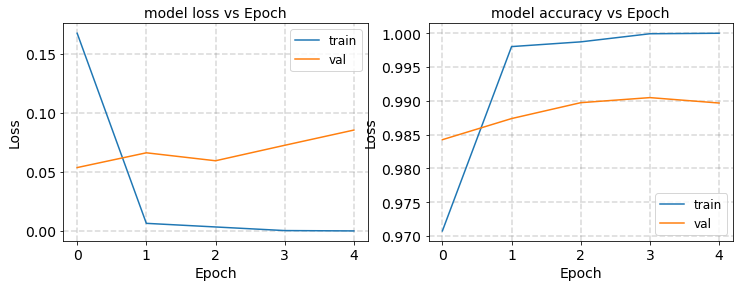

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1052 - accuracy: 0.9735 - val_loss: 0.0557 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.1408 - val_accuracy: 0.9796
Epoch 3/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0849 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 4.1022e-05 - accuracy: 1.0000 - val_loss: 0.1052 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 1.3326e-05 - accuracy: 1.0000 - val_loss: 0.1217 - val_accuracy: 0.9913


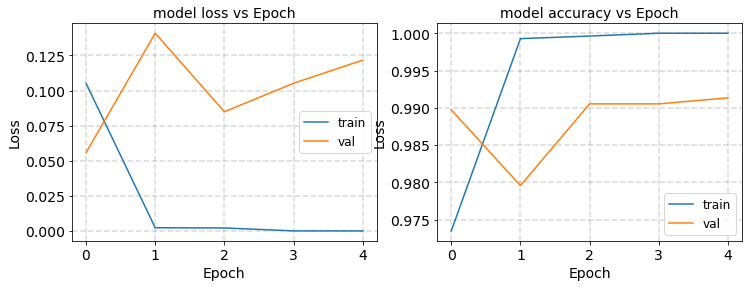

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1211 - accuracy: 0.9773 - val_loss: 0.0553 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0576 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0718 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 4s - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.0663 - val_accuracy: 0.9841
Epoch 5/5
1250/1250 - 4s - loss: 6.3508e-05 - accuracy: 1.0000 - val_loss: 0.1060 - val_accuracy: 0.9857


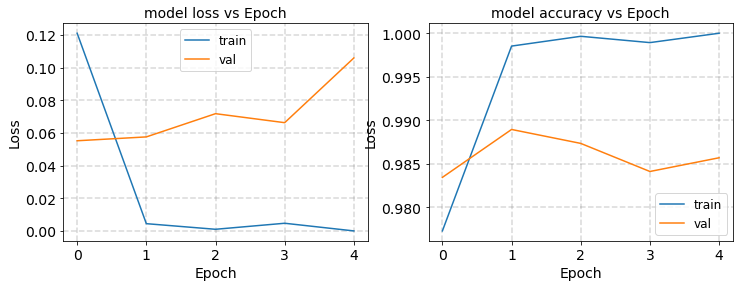

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

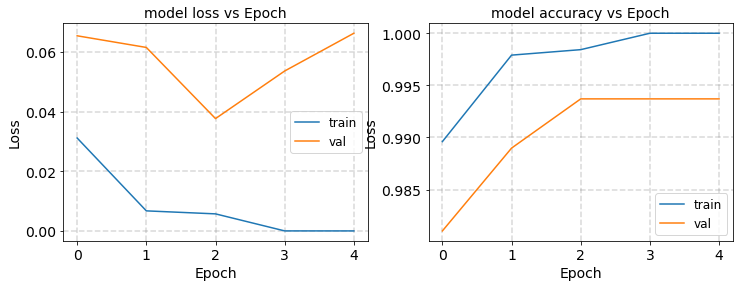

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0761 - accuracy: 0.9819 - val_loss: 0.0399 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.0553 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 4s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0769 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0778 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 4s - loss: 7.8267e-05 - accuracy: 1.0000 - val_loss: 0.1584 - val_accuracy: 0.9865


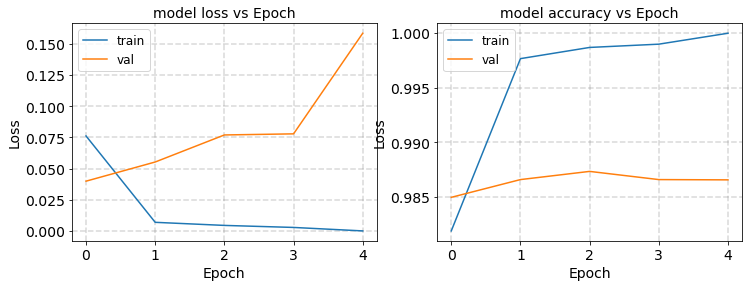

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0817 - accuracy: 0.9828 - val_loss: 0.0594 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 4s - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0929 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 4s - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.0554 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 5s - loss: 2.5315e-04 - accuracy: 0.9999 - val_loss: 0.1269 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 5s - loss: 3.1142e-06 - accuracy: 1.0000 - val_loss: 0.1452 - val_accuracy: 0.9873


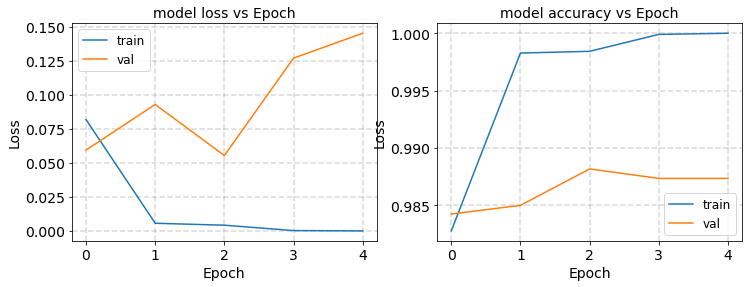

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0786 - accuracy: 0.9893 - val_loss: 0.0681 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 5s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0442 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 5s - loss: 3.3317e-05 - accuracy: 1.0000 - val_loss: 0.0551 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 5s - loss: 4.9244e-06 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 4s - loss: 1.8208e-06 - accuracy: 1.0000 - val_loss: 0.0662 - val_accuracy: 0.9937


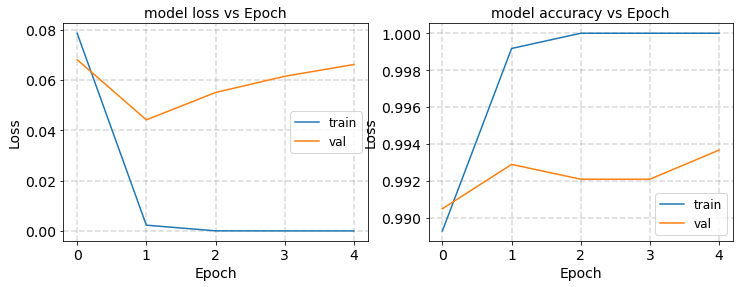

round1 [2 9 3 8]
2
Epoch 1/5
1250/1250 - 4s - loss: 7.6675e-07 - accuracy: 1.0000 - val_loss: 0.0700 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 4s - loss: 3.4902e-07 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 4s - loss: 1.6311e-07 - accuracy: 1.0000 - val_loss: 0.0802 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 5s - loss: 7.7860e-08 - accuracy: 1.0000 - val_loss: 0.0848 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 4s - loss: 3.7630e-08 - accuracy: 1.0000 - val_loss: 0.0889 - val_accuracy: 0.9937


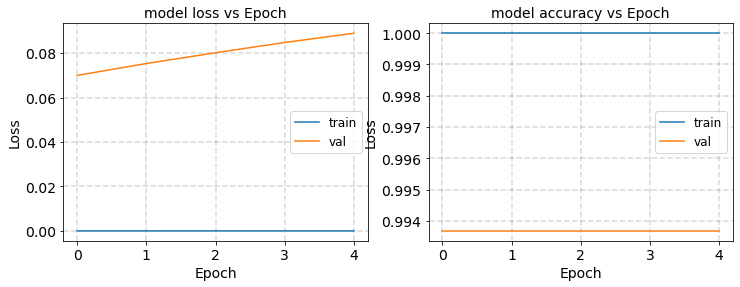

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0793 - accuracy: 0.9886 - val_loss: 0.0572 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.1025 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0591 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0579 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 2.4717e-06 - accuracy: 1.0000 - val_loss: 0.0669 - val_accuracy: 0.9929


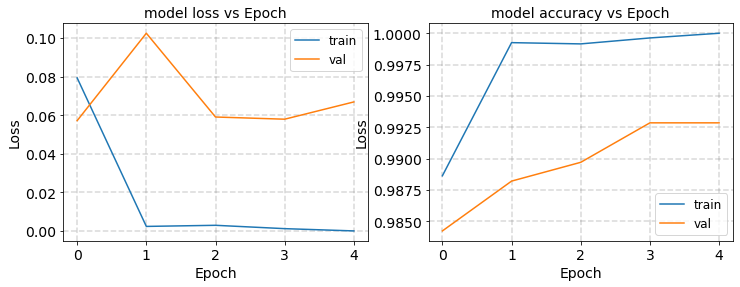

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0879 - accuracy: 0.9841 - val_loss: 0.0704 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.1096 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 4s - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0883 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1136 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1577 - val_accuracy: 0.9858


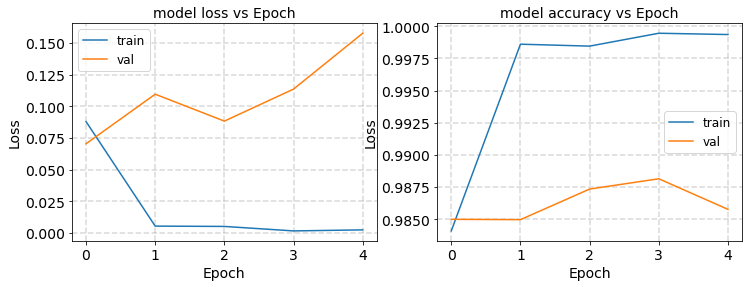

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0875 - accuracy: 0.9851 - val_loss: 0.0359 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 5s - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0739 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0674 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 1.1160e-05 - accuracy: 1.0000 - val_loss: 0.0829 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 5s - loss: 2.2369e-06 - accuracy: 1.0000 - val_loss: 0.0921 - val_accuracy: 0.9882


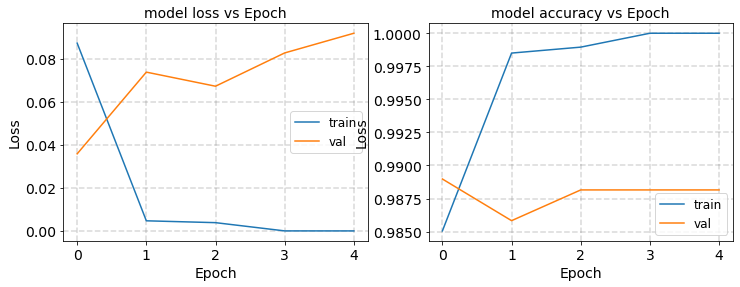

round2 [9 8 3 2]
9
Epoch 1/5
1250/1250 - 4s - loss: 0.0743 - accuracy: 0.9878 - val_loss: 0.0255 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0182 - val_accuracy: 0.9961
Epoch 3/5
1250/1250 - 5s - loss: 2.6400e-05 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 4s - loss: 3.0059e-06 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 4s - loss: 7.7088e-07 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 0.9952


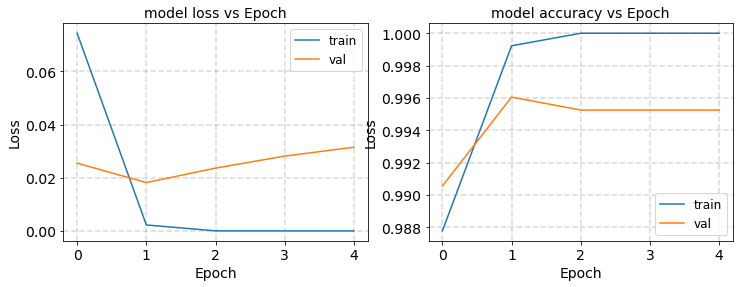

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0803 - accuracy: 0.9846 - val_loss: 0.0697 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 4s - loss: 7.0792e-04 - accuracy: 0.9998 - val_loss: 0.0481 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 2.5451e-05 - accuracy: 1.0000 - val_loss: 0.0653 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 2.3584e-06 - accuracy: 1.0000 - val_loss: 0.0748 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 4s - loss: 6.8143e-07 - accuracy: 1.0000 - val_loss: 0.0806 - val_accuracy: 0.9921


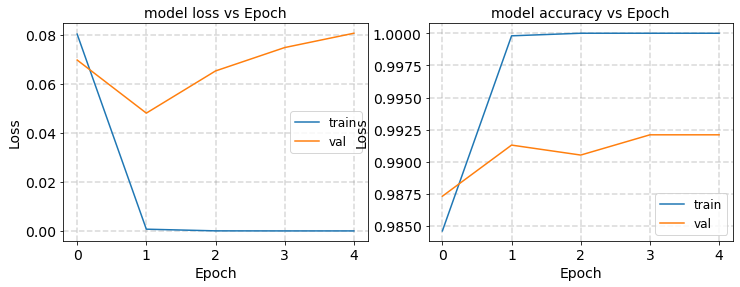

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1035 - accuracy: 0.9847 - val_loss: 0.0744 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.1110 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 4s - loss: 4.4353e-05 - accuracy: 1.0000 - val_loss: 0.1428 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 4s - loss: 6.7124e-06 - accuracy: 1.0000 - val_loss: 0.1671 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 4s - loss: 1.6002e-06 - accuracy: 1.0000 - val_loss: 0.1864 - val_accuracy: 0.9858


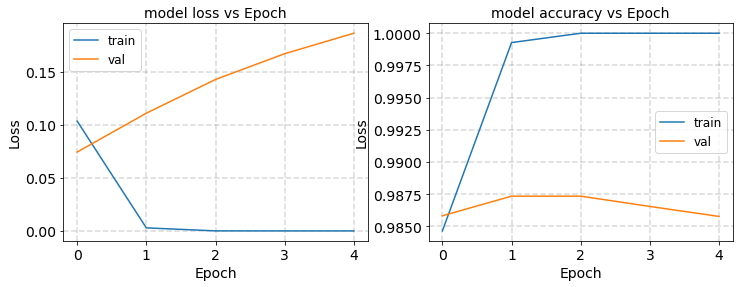

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0932 - accuracy: 0.9902 - val_loss: 0.0443 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0375 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 4s - loss: 9.5846e-05 - accuracy: 1.0000 - val_loss: 0.0514 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 1.3075e-05 - accuracy: 1.0000 - val_loss: 0.0564 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 5.2282e-06 - accuracy: 1.0000 - val_loss: 0.0620 - val_accuracy: 0.9913


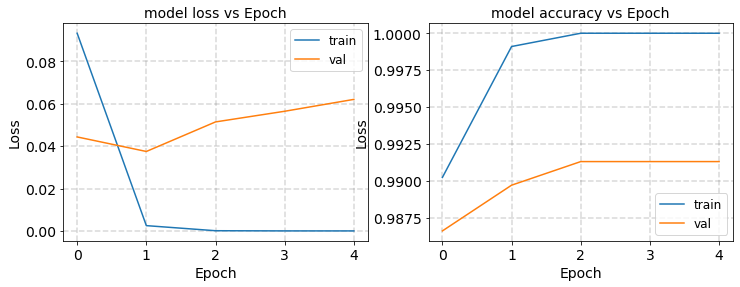

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_38 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_39 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

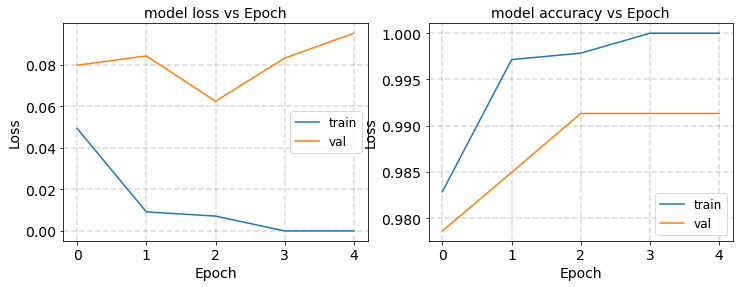

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0699 - accuracy: 0.9820 - val_loss: 0.0429 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.1396 - val_accuracy: 0.9723
Epoch 3/5
1250/1250 - 3s - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.1053 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 3s - loss: 4.9603e-06 - accuracy: 1.0000 - val_loss: 0.1352 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 3s - loss: 6.0376e-07 - accuracy: 1.0000 - val_loss: 0.1548 - val_accuracy: 0.9834


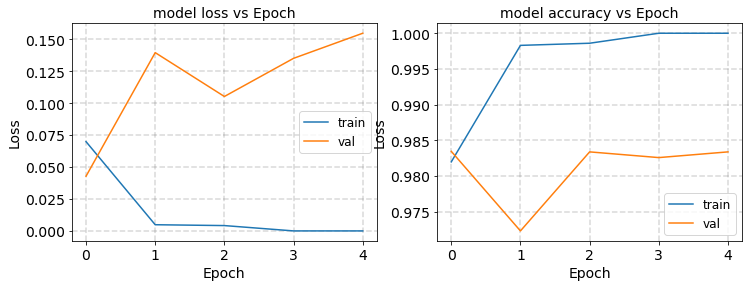

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0798 - accuracy: 0.9880 - val_loss: 0.0341 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0529 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 3.5893e-04 - accuracy: 0.9998 - val_loss: 0.0673 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 1.5045e-06 - accuracy: 1.0000 - val_loss: 0.0766 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 4.7407e-07 - accuracy: 1.0000 - val_loss: 0.0819 - val_accuracy: 0.9937


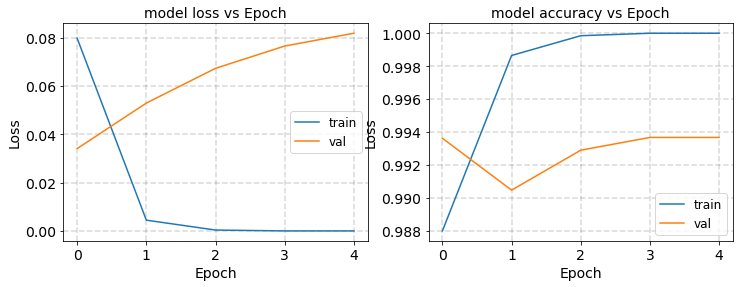

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0748 - accuracy: 0.9893 - val_loss: 0.0562 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0581 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 1.9689e-05 - accuracy: 1.0000 - val_loss: 0.0834 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 6.2650e-07 - accuracy: 1.0000 - val_loss: 0.0939 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 1.6951e-07 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 0.9929


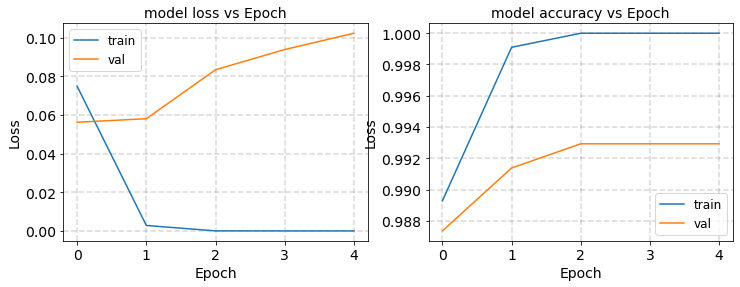

round1 [3 8 2 9]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.0956 - accuracy: 0.9827 - val_loss: 0.0729 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0948 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 6.5586e-05 - accuracy: 1.0000 - val_loss: 0.1652 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 6.6431e-07 - accuracy: 1.0000 - val_loss: 0.1919 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 1.7152e-07 - accuracy: 1.0000 - val_loss: 0.2113 - val_accuracy: 0.9874


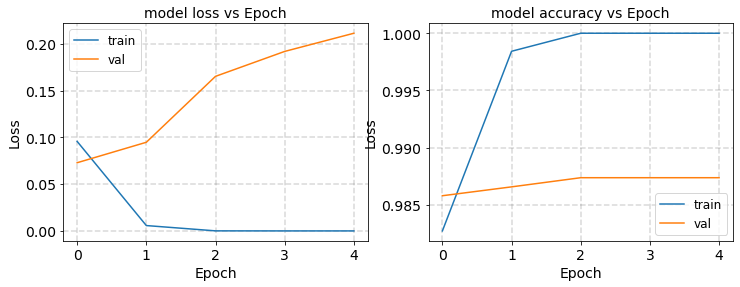

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0991 - accuracy: 0.9800 - val_loss: 0.0552 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 3s - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0587 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 4s - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.1099 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0728 - val_accuracy: 0.9849
Epoch 5/5
1250/1250 - 4s - loss: 2.1304e-04 - accuracy: 0.9999 - val_loss: 0.1218 - val_accuracy: 0.9826


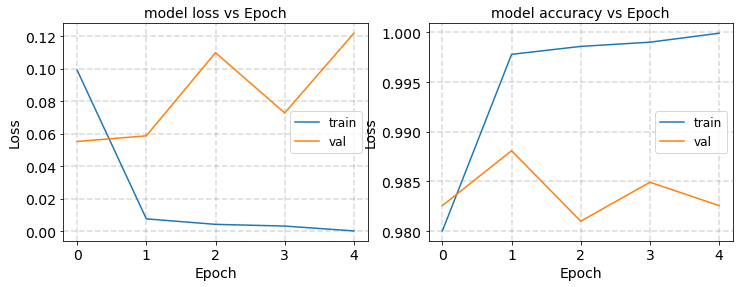

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0738 - accuracy: 0.9885 - val_loss: 0.0339 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 4s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0587 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0445 - val_accuracy: 0.9960
Epoch 4/5
1250/1250 - 4s - loss: 4.3635e-05 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 0.9968
Epoch 5/5
1250/1250 - 4s - loss: 2.7410e-06 - accuracy: 1.0000 - val_loss: 0.0765 - val_accuracy: 0.9968


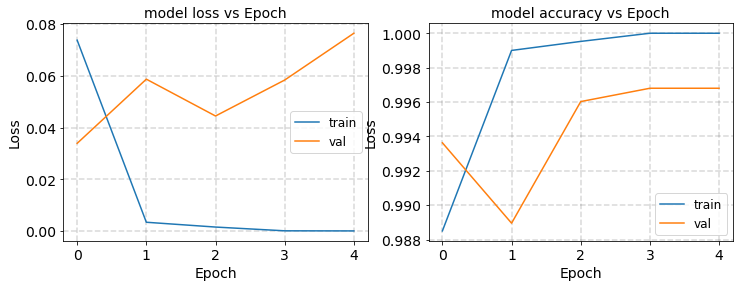

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0852 - accuracy: 0.9884 - val_loss: 0.0639 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 5s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0731 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 5s - loss: 1.4644e-05 - accuracy: 1.0000 - val_loss: 0.0966 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 5s - loss: 1.3546e-06 - accuracy: 1.0000 - val_loss: 0.1155 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 5s - loss: 3.4258e-07 - accuracy: 1.0000 - val_loss: 0.1278 - val_accuracy: 0.9929


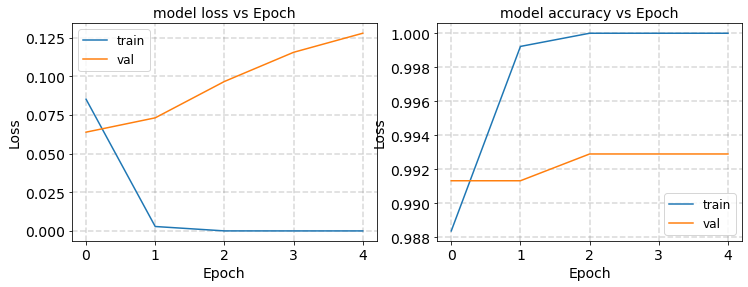

round2 [8 9 3 2]
8
Epoch 1/5
1250/1250 - 5s - loss: 0.0811 - accuracy: 0.9856 - val_loss: 0.0428 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 5s - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0395 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 5s - loss: 5.8448e-04 - accuracy: 0.9999 - val_loss: 0.0532 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 5s - loss: 1.3251e-05 - accuracy: 1.0000 - val_loss: 0.0600 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 5s - loss: 4.6099e-06 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9921


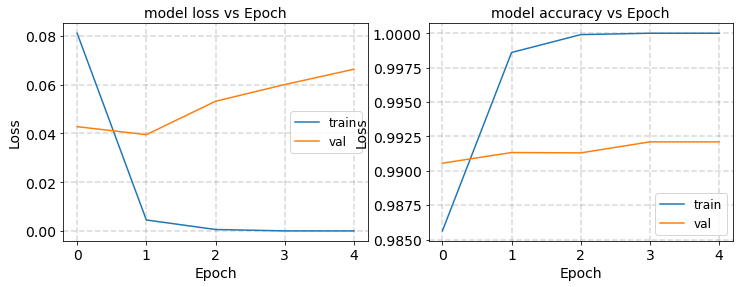

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0741 - accuracy: 0.9891 - val_loss: 0.0469 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 5s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0786 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 5s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1117 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 5s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0468 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 5s - loss: 8.2977e-04 - accuracy: 0.9998 - val_loss: 0.0508 - val_accuracy: 0.9913


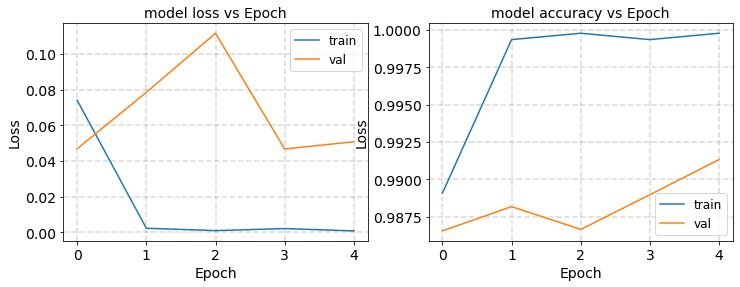

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1151 - accuracy: 0.9785 - val_loss: 0.0532 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 4s - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.0573 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0963 - val_accuracy: 0.9786
Epoch 4/5
1250/1250 - 4s - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0860 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 3.3740e-05 - accuracy: 1.0000 - val_loss: 0.1052 - val_accuracy: 0.9882


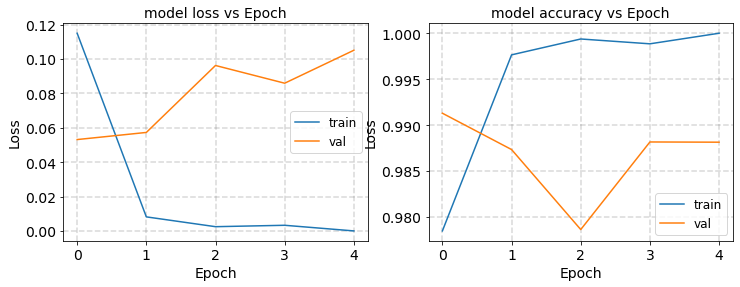

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1059 - accuracy: 0.9783 - val_loss: 0.0724 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 4s - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0427 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 4s - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0315 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 4s - loss: 2.1681e-04 - accuracy: 1.0000 - val_loss: 0.0435 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 4s - loss: 1.2491e-05 - accuracy: 1.0000 - val_loss: 0.0522 - val_accuracy: 0.9944


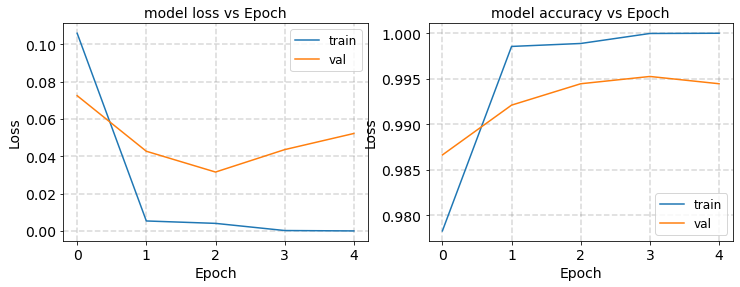

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_43 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_44 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_45 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

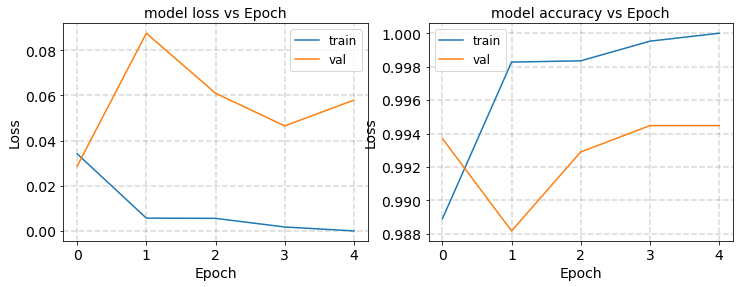

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0795 - accuracy: 0.9832 - val_loss: 0.0412 - val_accuracy: 0.9857
Epoch 2/5
1250/1250 - 4s - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0739 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 4s - loss: 5.1416e-05 - accuracy: 1.0000 - val_loss: 0.1020 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 4s - loss: 2.1297e-06 - accuracy: 1.0000 - val_loss: 0.1153 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 4s - loss: 6.5957e-07 - accuracy: 1.0000 - val_loss: 0.1266 - val_accuracy: 0.9881


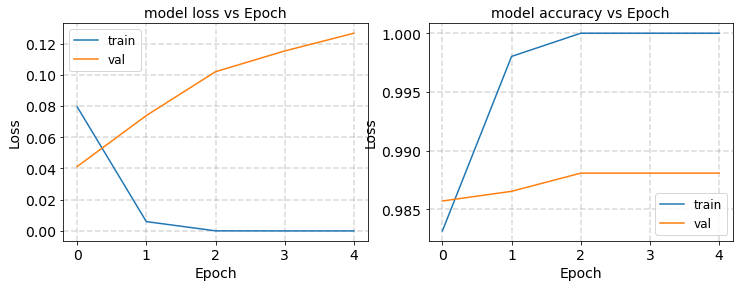

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0880 - accuracy: 0.9815 - val_loss: 0.0408 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0060 - accuracy: 0.9977 - val_loss: 0.0599 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 4s - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.1018 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 4s - loss: 6.5545e-06 - accuracy: 1.0000 - val_loss: 0.1213 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 4s - loss: 1.0614e-06 - accuracy: 1.0000 - val_loss: 0.1492 - val_accuracy: 0.9881


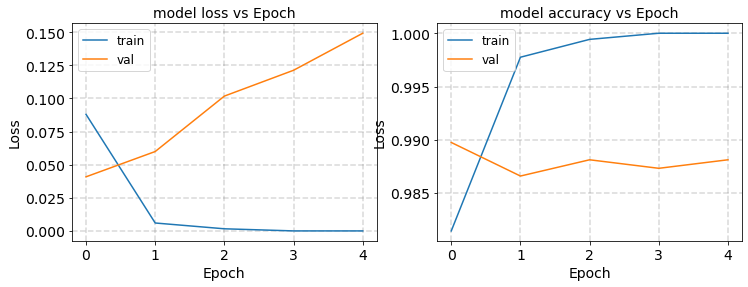

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0871 - accuracy: 0.9866 - val_loss: 0.0350 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 4s - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0394 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0518 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 9.6803e-06 - accuracy: 1.0000 - val_loss: 0.0772 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 6.2739e-07 - accuracy: 1.0000 - val_loss: 0.0835 - val_accuracy: 0.9913


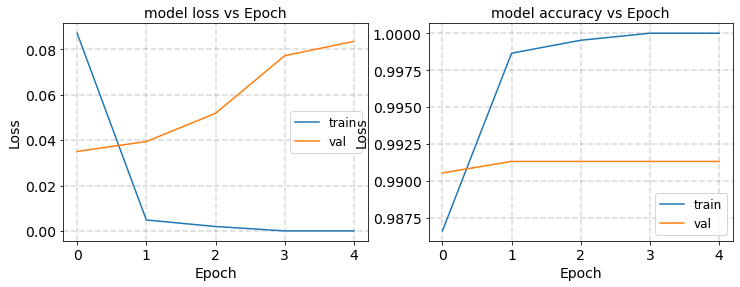

round1 [3 2 8 9]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.1018 - accuracy: 0.9844 - val_loss: 0.0526 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 4s - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0681 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0744 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 2.2346e-05 - accuracy: 1.0000 - val_loss: 0.0951 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 4s - loss: 4.8482e-06 - accuracy: 1.0000 - val_loss: 0.1041 - val_accuracy: 0.9882


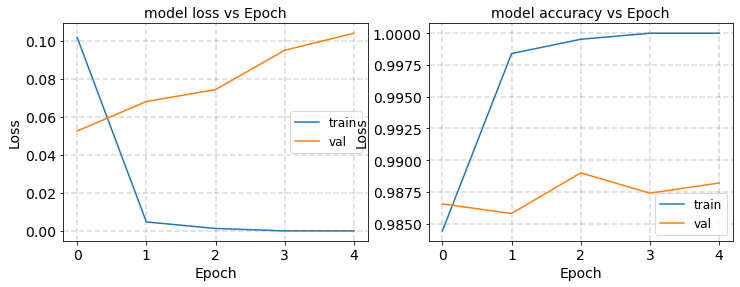

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0803 - accuracy: 0.9844 - val_loss: 0.0399 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 4s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0787 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 4s - loss: 1.2649e-05 - accuracy: 1.0000 - val_loss: 0.0829 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 4.0613e-06 - accuracy: 1.0000 - val_loss: 0.0889 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 4s - loss: 1.6117e-06 - accuracy: 1.0000 - val_loss: 0.0932 - val_accuracy: 0.9874


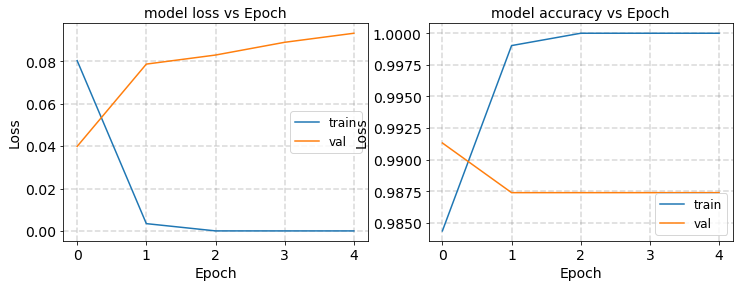

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0957 - accuracy: 0.9802 - val_loss: 0.0596 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 3s - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.0769 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1195 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 4.4823e-06 - accuracy: 1.0000 - val_loss: 0.1925 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 3s - loss: 2.2469e-07 - accuracy: 1.0000 - val_loss: 0.2207 - val_accuracy: 0.9834


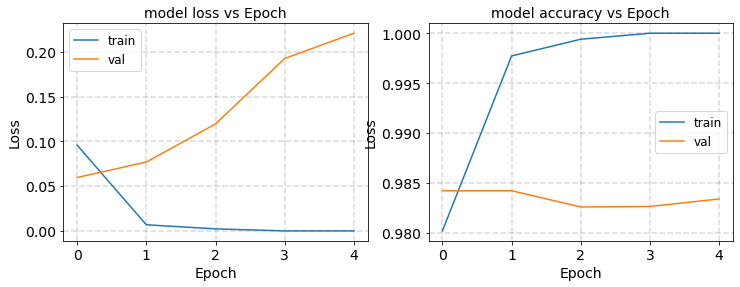

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0756 - accuracy: 0.9914 - val_loss: 0.0542 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0567 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 6.5901e-04 - accuracy: 0.9998 - val_loss: 0.0666 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 1.4992e-05 - accuracy: 1.0000 - val_loss: 0.0781 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 5.2162e-06 - accuracy: 1.0000 - val_loss: 0.0852 - val_accuracy: 0.9882


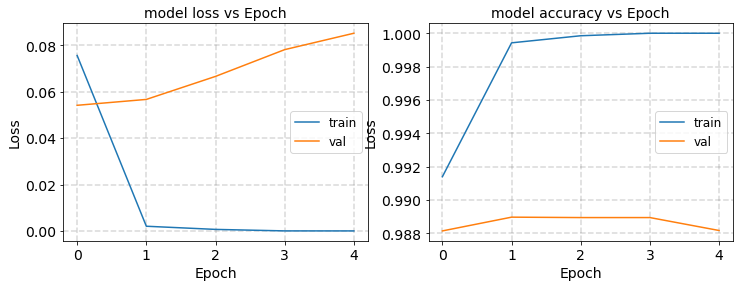

round2 [3 8 9 2]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.0921 - accuracy: 0.9865 - val_loss: 0.0907 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.1010 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 1.6470e-04 - accuracy: 1.0000 - val_loss: 0.1418 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 6.9778e-06 - accuracy: 1.0000 - val_loss: 0.1693 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 1.7888e-06 - accuracy: 1.0000 - val_loss: 0.1856 - val_accuracy: 0.9890


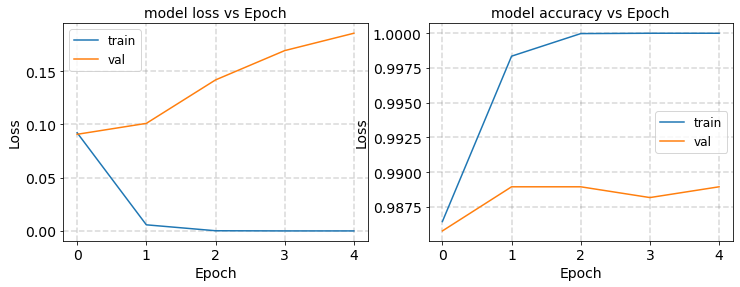

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0942 - accuracy: 0.9841 - val_loss: 0.0654 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.0799 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.2082 - val_accuracy: 0.9779
Epoch 4/5
1250/1250 - 3s - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.1041 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 3.4928e-05 - accuracy: 1.0000 - val_loss: 0.1237 - val_accuracy: 0.9882


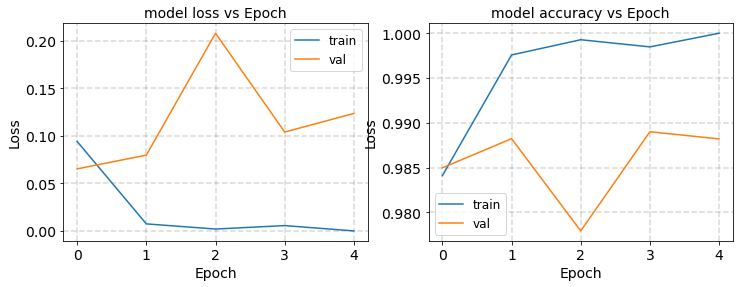

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0554 - accuracy: 0.9919 - val_loss: 0.0371 - val_accuracy: 0.9857
Epoch 2/5
1250/1250 - 3s - loss: 5.4866e-04 - accuracy: 0.9999 - val_loss: 0.0797 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 3s - loss: 9.8060e-06 - accuracy: 1.0000 - val_loss: 0.1008 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 3s - loss: 1.5763e-06 - accuracy: 1.0000 - val_loss: 0.1148 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 3s - loss: 5.0167e-07 - accuracy: 1.0000 - val_loss: 0.1259 - val_accuracy: 0.9889


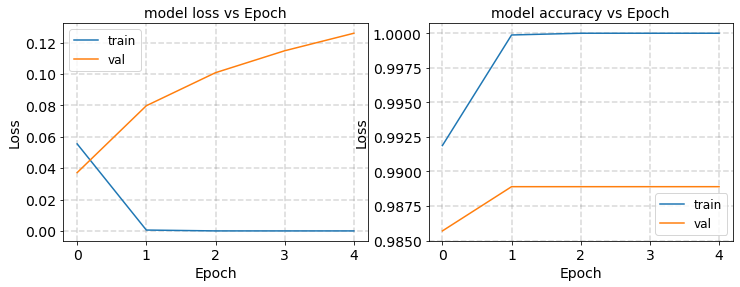

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1309 - accuracy: 0.9864 - val_loss: 0.0582 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0529 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 2.3733e-05 - accuracy: 1.0000 - val_loss: 0.0675 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 5.3447e-06 - accuracy: 1.0000 - val_loss: 0.0787 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 1.8820e-06 - accuracy: 1.0000 - val_loss: 0.0892 - val_accuracy: 0.9922


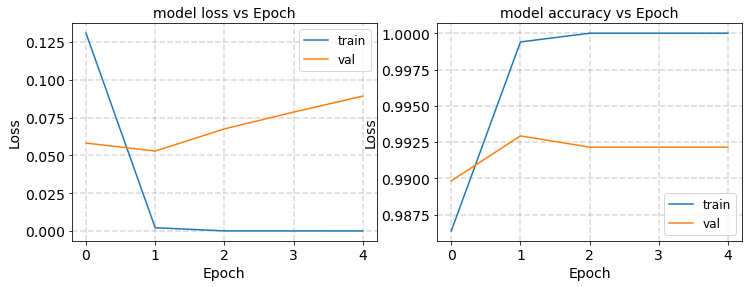

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_49 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_50 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_51 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

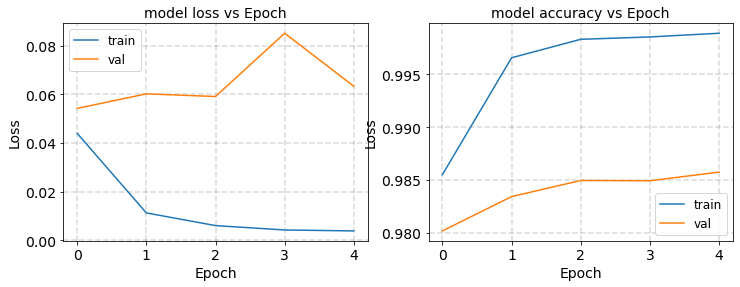

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0607 - accuracy: 0.9840 - val_loss: 0.0810 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 4s - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.1254 - val_accuracy: 0.9731
Epoch 3/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0691 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 8.0442e-06 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 2.4376e-06 - accuracy: 1.0000 - val_loss: 0.0837 - val_accuracy: 0.9850


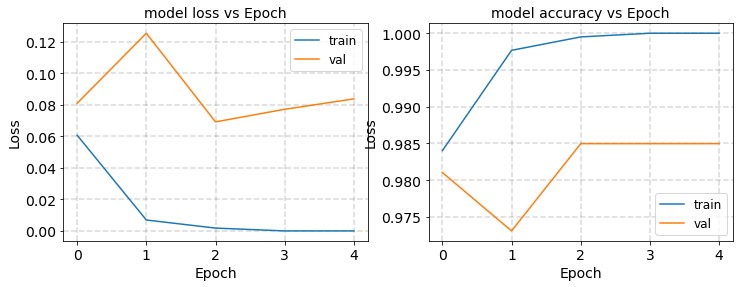

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0684 - accuracy: 0.9883 - val_loss: 0.0546 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 4s - loss: 0.0037 - accuracy: 0.9986 - val_loss: 0.0475 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 1.5619e-05 - accuracy: 1.0000 - val_loss: 0.0745 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 4s - loss: 4.4501e-07 - accuracy: 1.0000 - val_loss: 0.0842 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 4s - loss: 1.1562e-07 - accuracy: 1.0000 - val_loss: 0.0955 - val_accuracy: 0.9944


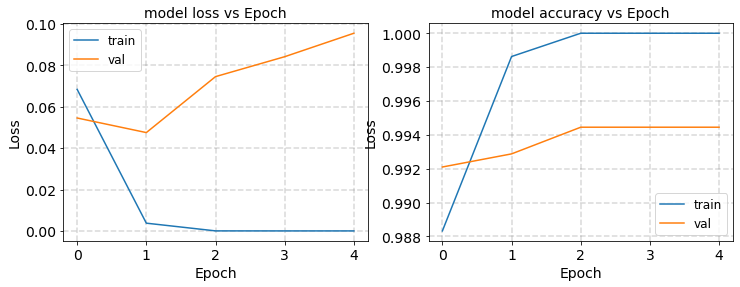

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0921 - accuracy: 0.9896 - val_loss: 0.0481 - val_accuracy: 0.9835
Epoch 2/5
1250/1250 - 4s - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0667 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 1.2397e-04 - accuracy: 1.0000 - val_loss: 0.0839 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 3.9166e-06 - accuracy: 1.0000 - val_loss: 0.1019 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 1.2234e-06 - accuracy: 1.0000 - val_loss: 0.1128 - val_accuracy: 0.9898


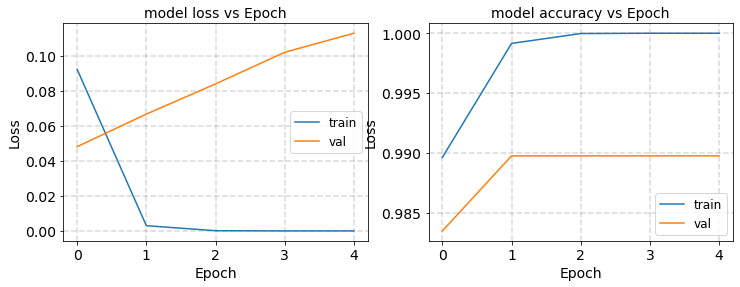

round1 [8 2 3 9]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.0828 - accuracy: 0.9818 - val_loss: 0.0598 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.0662 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 4s - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0889 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 2.2775e-04 - accuracy: 0.9999 - val_loss: 0.1039 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 4s - loss: 5.6738e-06 - accuracy: 1.0000 - val_loss: 0.1170 - val_accuracy: 0.9834


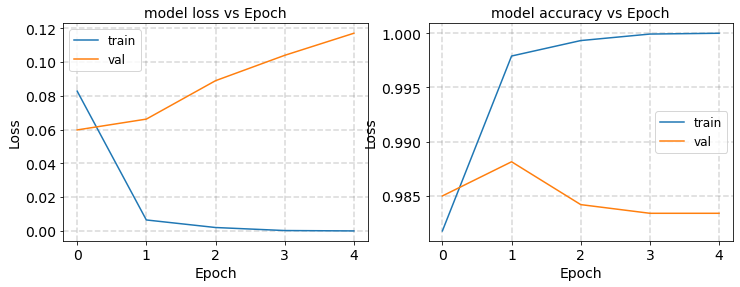

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0861 - accuracy: 0.9878 - val_loss: 0.0655 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0948 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0836 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 4s - loss: 3.8703e-05 - accuracy: 1.0000 - val_loss: 0.1160 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 4.5084e-06 - accuracy: 1.0000 - val_loss: 0.1266 - val_accuracy: 0.9913


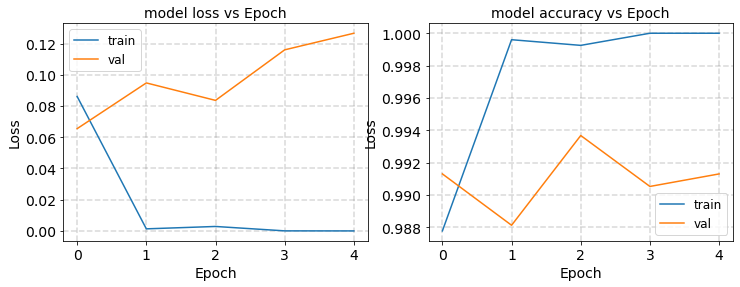

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0938 - accuracy: 0.9795 - val_loss: 0.0532 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0856 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0751 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 4s - loss: 1.9184e-05 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 4s - loss: 3.3075e-06 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9865


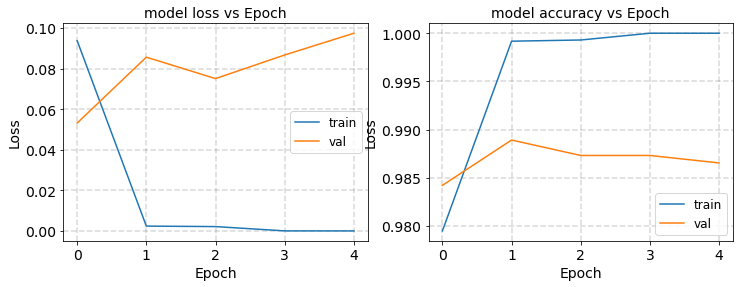

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0688 - accuracy: 0.9884 - val_loss: 0.0812 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 4s - loss: 3.0218e-04 - accuracy: 1.0000 - val_loss: 0.1282 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 4s - loss: 1.2209e-05 - accuracy: 1.0000 - val_loss: 0.1561 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 4s - loss: 3.6151e-06 - accuracy: 1.0000 - val_loss: 0.1787 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 4s - loss: 1.2508e-06 - accuracy: 1.0000 - val_loss: 0.2059 - val_accuracy: 0.9866


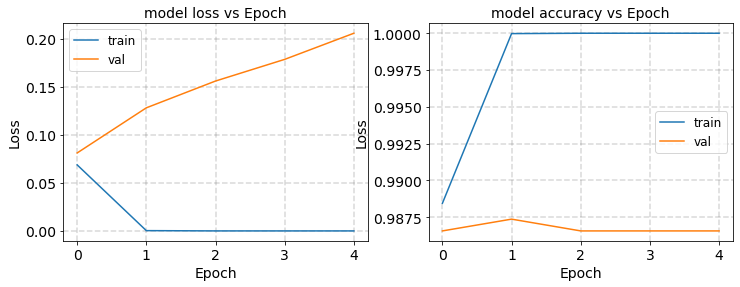

round2 [3 9 2 8]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.0906 - accuracy: 0.9844 - val_loss: 0.0611 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 4.4160e-04 - accuracy: 0.9999 - val_loss: 0.0912 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 5s - loss: 1.3266e-05 - accuracy: 1.0000 - val_loss: 0.1021 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 4.2483e-06 - accuracy: 1.0000 - val_loss: 0.1128 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 1.7145e-06 - accuracy: 1.0000 - val_loss: 0.1202 - val_accuracy: 0.9898


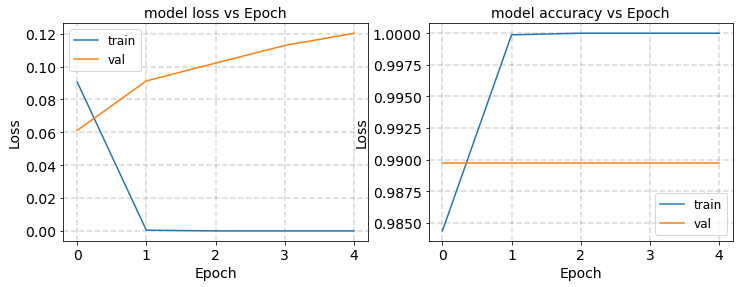

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0601 - accuracy: 0.9908 - val_loss: 0.0472 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0608 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0558 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 2.9349e-05 - accuracy: 1.0000 - val_loss: 0.0678 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 4.4863e-06 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 0.9898


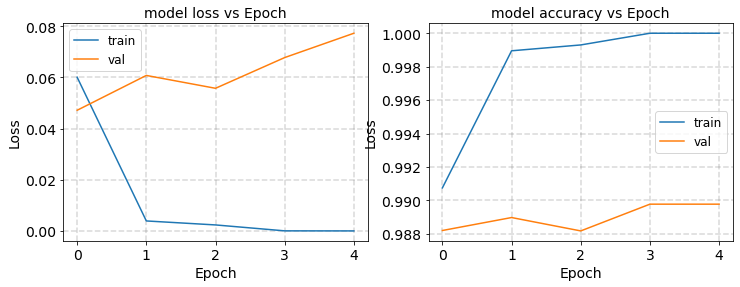

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0838 - accuracy: 0.9880 - val_loss: 0.0457 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 4s - loss: 1.5167e-04 - accuracy: 1.0000 - val_loss: 0.0594 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 1.4507e-05 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 5.2534e-06 - accuracy: 1.0000 - val_loss: 0.0680 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 2.2431e-06 - accuracy: 1.0000 - val_loss: 0.0734 - val_accuracy: 0.9921


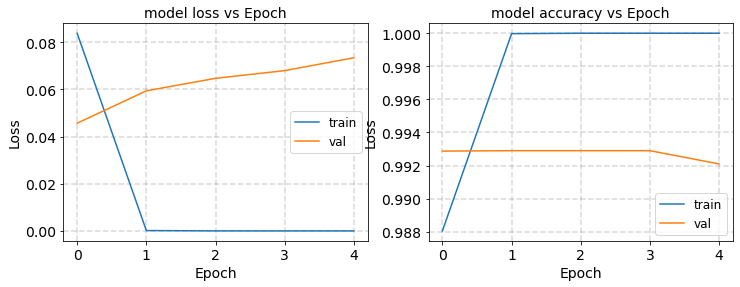

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1113 - accuracy: 0.9685 - val_loss: 0.0549 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.0719 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.0503 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0651 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0691 - val_accuracy: 0.9873


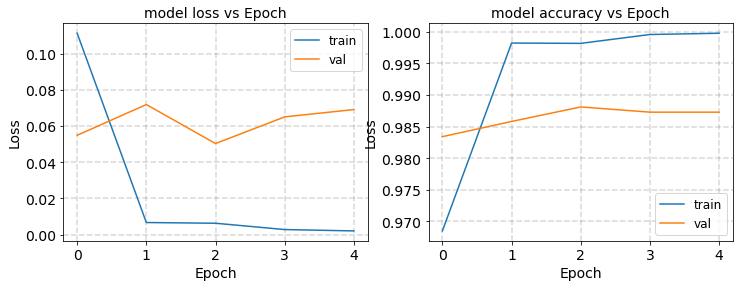

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_55 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_56 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_57 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

In [4]:
%%time
series = [2,3,8,9]
num_runs = 10
name = '2389_seq_prune_0_4_256_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=256,
                                  num_output_nodes=4,
                                  pruning=None,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_0_4_256_run0  2.14762         2.05975      0.0124965   
2389_seq_prune_0_4_256_run1   2.1042         2.06197      0.0157667   
2389_seq_prune_0_4_256_run2   2.0627         2.03223      0.0147067   
2389_seq_prune_0_4_256_run3  2.15173         2.13444      0.0191698   
2389_seq_prune_0_4_256_run4  2.14419         2.08241       0.021247   
2389_seq_prune_0_4_256_run5  2.10812         2.08658      0.0152511   
2389_seq_prune_0_4_256_run6  2.06316         2.03982      0.0153246   
2389_seq_prune_0_4_256_run7  2.13629         2.06684      0.0192485   
2389_seq_prune_0_4_256_run8  2.11389         2.05989     0.00974573   
2389_seq_prune_0_4_256_run9  2.16011         2.09639      0.0156944   

                            Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_0_4_256_run0      0.0027943        100       0          Yes   
2389_seq_prune_0_4_256_run1     0.00352553        100       0          Yes   
2389_seq_prune_0_4_256_run2     0.00328852        100       0          Yes   
2389_seq_prune_0_4_256_run3      0.0042865         85     0.3           No   
2389_seq_prune_0_4_256_run4     0.00475097        100       0          Yes   
2389_seq_prune_0_4_256_run5     0.00341025         90     0.2           No   
2389_seq_prune_0_4_256_run6     0.00342668         95     0.1           No   
2389_seq_prune_0_4_256_run7     0.00430409        100       0          Yes   
2389_seq_prune_0_4_256_run8     0.00217921        100       0          Yes   
2389_seq_prune_0_4_256_run9     0.00350939        100       0          Yes   

                            Direction  Accuracy  
2389_seq_prune_0_4_256_run0    larger  0.767075  
2389_seq_prune_0_4_256_run1    larger  0.899675  
2389_seq_prune_0_4_256_run2    larger    0.8394  
2389_seq_prune_0_4_256_run3    larger  0.853525  
2389_seq_prune_0_4_256_run4    larger    0.9558  
2389_seq_prune_0_4_256_run5    larger   0.95355  
2389_seq_prune_0_4_256_run6    larger  0.954925  
2389_seq_prune_0_4_256_run7    larger  0.931225  
2389_seq_prune_0_4_256_run8    larger  0.908775  
2389_seq_prune_0_4_256_run9    larger   0.94315

#### Save dataframe

In [6]:
import pickle

with open('df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open('df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_0_4_256_run0  2.14762         2.05975      0.0124965   
2389_seq_prune_0_4_256_run1   2.1042         2.06197      0.0157667   
2389_seq_prune_0_4_256_run2   2.0627         2.03223      0.0147067   
2389_seq_prune_0_4_256_run3  2.15173         2.13444      0.0191698   
2389_seq_prune_0_4_256_run4  2.14419         2.08241       0.021247   
2389_seq_prune_0_4_256_run5  2.10812         2.08658      0.0152511   
2389_seq_prune_0_4_256_run6  2.06316         2.03982      0.0153246   
2389_seq_prune_0_4_256_run7  2.13629         2.06684      0.0192485   
2389_seq_prune_0_4_256_run8  2.11389         2.05989     0.00974573   
2389_seq_prune_0_4_256_run9  2.16011         2.09639      0.0156944   

                            Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_0_4_256_run0      0.0027943        100       0          Yes   
2389_seq_prune_0_4_256_run1     0.00352553        100       0          Yes   
2389_seq_prune_0_4_256_run2     0.00328852        100       0          Yes   
2389_seq_prune_0_4_256_run3      0.0042865         85     0.3           No   
2389_seq_prune_0_4_256_run4     0.00475097        100       0          Yes   
2389_seq_prune_0_4_256_run5     0.00341025         90     0.2           No   
2389_seq_prune_0_4_256_run6     0.00342668         95     0.1           No   
2389_seq_prune_0_4_256_run7     0.00430409        100       0          Yes   
2389_seq_prune_0_4_256_run8     0.00217921        100       0          Yes   
2389_seq_prune_0_4_256_run9     0.00350939        100       0          Yes   

                            Direction  Accuracy  
2389_seq_prune_0_4_256_run0    larger  0.767075  
2389_seq_prune_0_4_256_run1    larger  0.899675  
2389_seq_prune_0_4_256_run2    larger    0.8394  
2389_seq_prune_0_4_256_run3    larger  0.853525  
2389_seq_prune_0_4_256_run4    larger    0.9558  
2389_seq_prune_0_4_256_run5    larger   0.95355  
2389_seq_prune_0_4_256_run6    larger  0.954925  
2389_seq_prune_0_4_256_run7    larger  0.931225  
2389_seq_prune_0_4_256_run8    larger  0.908775  
2389_seq_prune_0_4_256_run9    larger   0.94315

In [7]:
df_models[0].layers[1].get_weights()[0]

array([[-0.03255861, -0.01146169, -0.04583547, ..., -0.00422964,
         0.01968762, -0.0095089 ],
       [ 0.01910855, -0.06145129, -0.01174069, ...,  0.04225808,
        -0.06546827,  0.04751989],
       [ 0.03583238, -0.02737258, -0.01443592, ...,  0.0595541 ,
         0.00082902, -0.02554678],
       ...,
       [ 0.02018084,  0.01007148, -0.03486984, ...,  0.00946115,
         0.02641425, -0.06593689],
       [-0.02239442, -0.02235484, -0.0461558 , ...,  0.03059055,
         0.0124406 ,  0.02892126],
       [-0.01775329, -0.04414956, -0.00286601, ...,  0.00623102,
        -0.0133853 ,  0.06135225]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

2.1476249153899447
2.0597544066128615
0.012496481958274786
0.002794298313830211
100.0
0.0
Yes
larger
0.7670750021934509
